# Design CTP-10 Aire DNA-MERFISH library for Aire-inducible gene introns

by Pu Zheng

2021.4.15



# Table of contents


> 0. [Minimum required packages and settings](#0)
>>
>> 0.1: [import required packages](#0.1)
>
> 1. [Extract region sequences](#1)

<a id='0.1'></a>
## 0.1 load required packages

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

14212


<a id='1'></a>
# 1 Extract region sequences

In [2]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire'

In [5]:
resolution = 0
flanking = 5000
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'Genes_intronic_RNA')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Genes_intronic_RNA
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Genes_intronic_RNA\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Genes_intronic_RNA\reports


<module 'ImageAnalysis3.library_tools.sequences' from '..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\sequences.py'>

In [623]:
ref_filename

'\\\\10.245.74.212\\Chromatin_NAS_2\\Libraries\\Genomes\\mouse\\GRCm38_ensembl\\Transcriptome\\Mus_musculus.GRCm38.102.chr.gff3'

In [624]:
reload(library_tools.references)
reload(library_tools.sequences)

with library_tools.references.gff3_reader(ref_filename, auto_read=True) as ref_rd:
    #infos = _handle.load_all()
    #ref_rd._load_headers()
    #gene_infos = ref_rd.load_gene_by_id('ENSMUSG00000064842')
    #gene_dict = ref_rd.parse_gene_info(gene_infos)
    #
    #gene_info_dict = ref_rd._batch_parse_gene_info()
    pass
    

- loading from save_file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Transcriptome\Mus_musculus.GRCm38.102.chr.pkl
parsing all gene information
gene:ENSMUSG00000102693
gene:ENSMUSG00000064842
gene:ENSMUSG00000051951
gene:ENSMUSG00000102851
gene:ENSMUSG00000103377
gene:ENSMUSG00000104017
gene:ENSMUSG00000103025
gene:ENSMUSG00000089699
gene:ENSMUSG00000103201
gene:ENSMUSG00000103147
gene:ENSMUSG00000103161
gene:ENSMUSG00000102331
gene:ENSMUSG00000102348
gene:ENSMUSG00000102592
gene:ENSMUSG00000088333
gene:ENSMUSG00000102343
gene:ENSMUSG00000025900
gene:ENSMUSG00000102948
gene:ENSMUSG00000104123
gene:ENSMUSG00000025902
gene:ENSMUSG00000104238
gene:ENSMUSG00000102269
gene:ENSMUSG00000096126
gene:ENSMUSG00000103003
gene:ENSMUSG00000104328
gene:ENSMUSG00000102735
gene:ENSMUSG00000098104
gene:ENSMUSG00000102175
gene:ENSMUSG00000088000
gene:ENSMUSG00000103265
gene:ENSMUSG00000103922
gene:ENSMUSG00000033845
gene:ENSMUSG00000102275
gene:ENSMUSG00000025903
gene:ENSMUSG

gene:ENSMUSG00000100218
gene:ENSMUSG00000100361
gene:ENSMUSG00000100894
gene:ENSMUSG00000095121
gene:ENSMUSG00000065255
gene:ENSMUSG00000100843
gene:ENSMUSG00000087764
gene:ENSMUSG00000025995
gene:ENSMUSG00000099850
gene:ENSMUSG00000084817
gene:ENSMUSG00000098549
gene:ENSMUSG00000099381
gene:ENSMUSG00000025993
gene:ENSMUSG00000099946
gene:ENSMUSG00000070896
gene:ENSMUSG00000090682
gene:ENSMUSG00000044457
gene:ENSMUSG00000099432
gene:ENSMUSG00000041144
gene:ENSMUSG00000096047
gene:ENSMUSG00000101262
gene:ENSMUSG00000101337
gene:ENSMUSG00000025986
gene:ENSMUSG00000100213
gene:ENSMUSG00000103129
gene:ENSMUSG00000100160
gene:ENSMUSG00000101921
gene:ENSMUSG00000101447
gene:ENSMUSG00000081185
gene:ENSMUSG00000103246
gene:ENSMUSG00000098876
gene:ENSMUSG00000100530
gene:ENSMUSG00000104067
gene:ENSMUSG00000100033
gene:ENSMUSG00000094968
gene:ENSMUSG00000088017
gene:ENSMUSG00000101996
gene:ENSMUSG00000096973
gene:ENSMUSG00000064943
gene:ENSMUSG00000100866
gene:ENSMUSG00000101721
gene:ENSMUSG0000

gene:ENSMUSG00000092220
gene:ENSMUSG00000118583
gene:ENSMUSG00000090175
gene:ENSMUSG00000089675
gene:ENSMUSG00000090124
gene:ENSMUSG00000082837
gene:ENSMUSG00000090145
gene:ENSMUSG00000084195
gene:ENSMUSG00000081261
gene:ENSMUSG00000054545
gene:ENSMUSG00000081602
gene:ENSMUSG00000082513
gene:ENSMUSG00000082677
gene:ENSMUSG00000089943
gene:ENSMUSG00000118621
gene:ENSMUSG00000081488
gene:ENSMUSG00000083277
gene:ENSMUSG00000090171
gene:ENSMUSG00000081984
gene:ENSMUSG00000089960
gene:ENSMUSG00000079429
gene:ENSMUSG00000044783
gene:ENSMUSG00000036251
gene:ENSMUSG00000085420
gene:ENSMUSG00000026295
gene:ENSMUSG00000099553
gene:ENSMUSG00000100908
gene:ENSMUSG00000062310
gene:ENSMUSG00000100798
gene:ENSMUSG00000104057
gene:ENSMUSG00000100367
gene:ENSMUSG00000049866
gene:ENSMUSG00000101736
gene:ENSMUSG00000097398
gene:ENSMUSG00000099848
gene:ENSMUSG00000101333
gene:ENSMUSG00000099378
gene:ENSMUSG00000099544
gene:ENSMUSG00000036206
gene:ENSMUSG00000102700
gene:ENSMUSG00000102083
gene:ENSMUSG0000

gene:ENSMUSG00000102661
gene:ENSMUSG00000033964
gene:ENSMUSG00000033952
gene:ENSMUSG00000026368
gene:ENSMUSG00000057037
gene:ENSMUSG00000090623
gene:ENSMUSG00000096117
gene:ENSMUSG00000070594
gene:ENSMUSG00000095393
gene:ENSMUSG00000033898
gene:ENSMUSG00000089991
gene:ENSMUSG00000104496
gene:ENSMUSG00000085867
gene:ENSMUSG00000102905
gene:ENSMUSG00000087930
gene:ENSMUSG00000103691
gene:ENSMUSG00000026365
gene:ENSMUSG00000052726
gene:ENSMUSG00000102698
gene:ENSMUSG00000102368
gene:ENSMUSG00000102500
gene:ENSMUSG00000095238
gene:ENSMUSG00000093879
gene:ENSMUSG00000089418
gene:ENSMUSG00000102740
gene:ENSMUSG00000104147
gene:ENSMUSG00000103858
gene:ENSMUSG00000099671
gene:ENSMUSG00000103890
gene:ENSMUSG00000101909
gene:ENSMUSG00000102818
gene:ENSMUSG00000101795
gene:ENSMUSG00000026361
gene:ENSMUSG00000033849
gene:ENSMUSG00000089640
gene:ENSMUSG00000018196
gene:ENSMUSG00000018199
gene:ENSMUSG00000018189
gene:ENSMUSG00000100455
gene:ENSMUSG00000088323
gene:ENSMUSG00000026360
gene:ENSMUSG0000

gene:ENSMUSG00000085563
gene:ENSMUSG00000103930
gene:ENSMUSG00000038776
gene:ENSMUSG00000103516
gene:ENSMUSG00000102858
gene:ENSMUSG00000038768
gene:ENSMUSG00000104390
gene:ENSMUSG00000103328
gene:ENSMUSG00000102219
gene:ENSMUSG00000026516
gene:ENSMUSG00000103178
gene:ENSMUSG00000062169
gene:ENSMUSG00000038733
gene:ENSMUSG00000054135
gene:ENSMUSG00000081214
gene:ENSMUSG00000103260
gene:ENSMUSG00000026514
gene:ENSMUSG00000102276
gene:ENSMUSG00000089888
gene:ENSMUSG00000089927
gene:ENSMUSG00000050625
gene:ENSMUSG00000047369
gene:ENSMUSG00000103100
gene:ENSMUSG00000064970
gene:ENSMUSG00000004880
gene:ENSMUSG00000089429
gene:ENSMUSG00000056699
gene:ENSMUSG00000022995
gene:ENSMUSG00000103722
gene:ENSMUSG00000103317
gene:ENSMUSG00000102950
gene:ENSMUSG00000102760
gene:ENSMUSG00000103379
gene:ENSMUSG00000026511
gene:ENSMUSG00000103018
gene:ENSMUSG00000091013
gene:ENSMUSG00000038633
gene:ENSMUSG00000100147
gene:ENSMUSG00000047539
gene:ENSMUSG00000097260
gene:ENSMUSG00000073482
gene:ENSMUSG0000

gene:ENSMUSG00000063953
gene:ENSMUSG00000111550
gene:ENSMUSG00000110865
gene:ENSMUSG00000110987
gene:ENSMUSG00000110731
gene:ENSMUSG00000044499
gene:ENSMUSG00000111231
gene:ENSMUSG00000088423
gene:ENSMUSG00000019777
gene:ENSMUSG00000103299
gene:ENSMUSG00000069662
gene:ENSMUSG00000046463
gene:ENSMUSG00000110799
gene:ENSMUSG00000097742
gene:ENSMUSG00000111549
gene:ENSMUSG00000096080
gene:ENSMUSG00000111488
gene:ENSMUSG00000111234
gene:ENSMUSG00000077576
gene:ENSMUSG00000088925
gene:ENSMUSG00000111048
gene:ENSMUSG00000111208
gene:ENSMUSG00000110782
gene:ENSMUSG00000094521
gene:ENSMUSG00000094311
gene:ENSMUSG00000111431
gene:ENSMUSG00000019846
gene:ENSMUSG00000051736
gene:ENSMUSG00000019845
gene:ENSMUSG00000062074
gene:ENSMUSG00000111055
gene:ENSMUSG00000111877
gene:ENSMUSG00000111008
gene:ENSMUSG00000111183
gene:ENSMUSG00000019843
gene:ENSMUSG00000085799
gene:ENSMUSG00000087014
gene:ENSMUSG00000086915
gene:ENSMUSG00000019842
gene:ENSMUSG00000087177
gene:ENSMUSG00000111358
gene:ENSMUSG0000

gene:ENSMUSG00000020317
gene:ENSMUSG00000045912
gene:ENSMUSG00000020312
gene:ENSMUSG00000111977
gene:ENSMUSG00000035963
gene:ENSMUSG00000020310
gene:ENSMUSG00000020308
gene:ENSMUSG00000020307
gene:ENSMUSG00000054206
gene:ENSMUSG00000065220
gene:ENSMUSG00000023175
gene:ENSMUSG00000020331
gene:ENSMUSG00000020329
gene:ENSMUSG00000020327
gene:ENSMUSG00000035890
gene:ENSMUSG00000020325
gene:ENSMUSG00000020323
gene:ENSMUSG00000035863
gene:ENSMUSG00000112828
gene:ENSMUSG00000035852
gene:ENSMUSG00000091994
gene:ENSMUSG00000006498
gene:ENSMUSG00000035835
gene:ENSMUSG00000098562
gene:ENSMUSG00000090860
gene:ENSMUSG00000057729
gene:ENSMUSG00000020125
gene:ENSMUSG00000111897
gene:ENSMUSG00000061780
gene:ENSMUSG00000013833
gene:ENSMUSG00000095023
gene:ENSMUSG00000035781
gene:ENSMUSG00000097854
gene:ENSMUSG00000035773
gene:ENSMUSG00000019564
gene:ENSMUSG00000035754
gene:ENSMUSG00000035745
gene:ENSMUSG00000013858
gene:ENSMUSG00000095615
gene:ENSMUSG00000004665
gene:ENSMUSG00000035722
gene:ENSMUSG0000

gene:ENSMUSG00000111913
gene:ENSMUSG00000112230
gene:ENSMUSG00000112029
gene:ENSMUSG00000112535
gene:ENSMUSG00000112198
gene:ENSMUSG00000112616
gene:ENSMUSG00000028630
gene:ENSMUSG00000104443
gene:ENSMUSG00000112402
gene:ENSMUSG00000098162
gene:ENSMUSG00000112854
gene:ENSMUSG00000112540
gene:ENSMUSG00000112778
gene:ENSMUSG00000112683
gene:ENSMUSG00000100681
gene:ENSMUSG00000112609
gene:ENSMUSG00000112161
gene:ENSMUSG00000020114
gene:ENSMUSG00000112155
gene:ENSMUSG00000112199
gene:ENSMUSG00000111972
gene:ENSMUSG00000100558
gene:ENSMUSG00000085454
gene:ENSMUSG00000085592
gene:ENSMUSG00000034813
gene:ENSMUSG00000112741
gene:ENSMUSG00000112287
gene:ENSMUSG00000112243
gene:ENSMUSG00000112555
gene:ENSMUSG00000112106
gene:ENSMUSG00000084764
gene:ENSMUSG00000085418
gene:ENSMUSG00000020228
gene:ENSMUSG00000020227
gene:ENSMUSG00000112894
gene:ENSMUSG00000020225
gene:ENSMUSG00000020224
gene:ENSMUSG00000112322
gene:ENSMUSG00000112672
gene:ENSMUSG00000102382
gene:ENSMUSG00000056758
gene:ENSMUSG0000

gene:ENSMUSG00000078157
gene:ENSMUSG00000080851
gene:ENSMUSG00000088135
gene:ENSMUSG00000080906
gene:ENSMUSG00000020315
gene:ENSMUSG00000101872
gene:ENSMUSG00000073073
gene:ENSMUSG00000040919
gene:ENSMUSG00000060923
gene:ENSMUSG00000081712
gene:ENSMUSG00000082078
gene:ENSMUSG00000081887
gene:ENSMUSG00000083655
gene:ENSMUSG00000087474
gene:ENSMUSG00000083990
gene:ENSMUSG00000040850
gene:ENSMUSG00000086986
gene:ENSMUSG00000043999
gene:ENSMUSG00000020305
gene:ENSMUSG00000084146
gene:ENSMUSG00000020311
gene:ENSMUSG00000020309
gene:ENSMUSG00000082213
gene:ENSMUSG00000082049
gene:ENSMUSG00000079890
gene:ENSMUSG00000091195
gene:ENSMUSG00000020303
gene:ENSMUSG00000044502
gene:ENSMUSG00000103635
gene:ENSMUSG00000085772
gene:ENSMUSG00000086335
gene:ENSMUSG00000020300
gene:ENSMUSG00000020299
gene:ENSMUSG00000020297
gene:ENSMUSG00000086386
gene:ENSMUSG00000081613
gene:ENSMUSG00000020279
gene:ENSMUSG00000040767
gene:ENSMUSG00000020282
gene:ENSMUSG00000020289
gene:ENSMUSG00000020287
gene:ENSMUSG0000

gene:ENSMUSG00000084069
gene:ENSMUSG00000088787
gene:ENSMUSG00000020894
gene:ENSMUSG00000020893
gene:ENSMUSG00000097386
gene:ENSMUSG00000023781
gene:ENSMUSG00000020892
gene:ENSMUSG00000032807
gene:ENSMUSG00000020891
gene:ENSMUSG00000020890
gene:ENSMUSG00000089438
gene:ENSMUSG00000087003
gene:ENSMUSG00000032782
gene:ENSMUSG00000049299
gene:ENSMUSG00000018470
gene:ENSMUSG00000086900
gene:ENSMUSG00000043419
gene:ENSMUSG00000018474
gene:ENSMUSG00000087881
gene:ENSMUSG00000044795
gene:ENSMUSG00000059278
gene:ENSMUSG00000045377
gene:ENSMUSG00000018476
gene:ENSMUSG00000085178
gene:ENSMUSG00000005237
gene:ENSMUSG00000086591
gene:ENSMUSG00000098432
gene:ENSMUSG00000003934
gene:ENSMUSG00000041346
gene:ENSMUSG00000059552
gene:ENSMUSG00000041329
gene:ENSMUSG00000005202
gene:ENSMUSG00000069835
gene:ENSMUSG00000083485
gene:ENSMUSG00000083300
gene:ENSMUSG00000018765
gene:ENSMUSG00000080573
gene:ENSMUSG00000041287
gene:ENSMUSG00000018761
gene:ENSMUSG00000088752
gene:ENSMUSG00000018774
gene:ENSMUSG0000

gene:ENSMUSG00000039110
gene:ENSMUSG00000039096
gene:ENSMUSG00000076435
gene:ENSMUSG00000039084
gene:ENSMUSG00000082945
gene:ENSMUSG00000020869
gene:ENSMUSG00000039055
gene:ENSMUSG00000024414
gene:ENSMUSG00000020868
gene:ENSMUSG00000085051
gene:ENSMUSG00000056008
gene:ENSMUSG00000020870
gene:ENSMUSG00000075611
gene:ENSMUSG00000075610
gene:ENSMUSG00000083227
gene:ENSMUSG00000081478
gene:ENSMUSG00000081007
gene:ENSMUSG00000081586
gene:ENSMUSG00000043522
gene:ENSMUSG00000064512
gene:ENSMUSG00000001506
gene:ENSMUSG00000089404
gene:ENSMUSG00000001508
gene:ENSMUSG00000038994
gene:ENSMUSG00000038976
gene:ENSMUSG00000047181
gene:ENSMUSG00000038967
gene:ENSMUSG00000087630
gene:ENSMUSG00000001507
gene:ENSMUSG00000001510
gene:ENSMUSG00000020871
gene:ENSMUSG00000086552
gene:ENSMUSG00000083548
gene:ENSMUSG00000085992
gene:ENSMUSG00000020872
gene:ENSMUSG00000038909
gene:ENSMUSG00000085143
gene:ENSMUSG00000085509
gene:ENSMUSG00000038893
gene:ENSMUSG00000101258
gene:ENSMUSG00000020873
gene:ENSMUSG0000

gene:ENSMUSG00000059923
gene:ENSMUSG00000084277
gene:ENSMUSG00000083394
gene:ENSMUSG00000089460
gene:ENSMUSG00000084130
gene:ENSMUSG00000020747
gene:ENSMUSG00000093539
gene:ENSMUSG00000034471
gene:ENSMUSG00000020781
gene:ENSMUSG00000020782
gene:ENSMUSG00000034427
gene:ENSMUSG00000020752
gene:ENSMUSG00000048442
gene:ENSMUSG00000075420
gene:ENSMUSG00000087072
gene:ENSMUSG00000020755
gene:ENSMUSG00000087064
gene:ENSMUSG00000020758
gene:ENSMUSG00000020766
gene:ENSMUSG00000016559
gene:ENSMUSG00000020770
gene:ENSMUSG00000057948
gene:ENSMUSG00000034341
gene:ENSMUSG00000020773
gene:ENSMUSG00000054517
gene:ENSMUSG00000020775
gene:ENSMUSG00000020776
gene:ENSMUSG00000104857
gene:ENSMUSG00000105120
gene:ENSMUSG00000020777
gene:ENSMUSG00000020778
gene:ENSMUSG00000092300
gene:ENSMUSG00000034282
gene:ENSMUSG00000020780
gene:ENSMUSG00000020793
gene:ENSMUSG00000118502
gene:ENSMUSG00000020792
gene:ENSMUSG00000064588
gene:ENSMUSG00000034227
gene:ENSMUSG00000052949
gene:ENSMUSG00000081929
gene:ENSMUSG0000

gene:ENSMUSG00000002997
gene:ENSMUSG00000112569
gene:ENSMUSG00000112071
gene:ENSMUSG00000020573
gene:ENSMUSG00000111893
gene:ENSMUSG00000112578
gene:ENSMUSG00000065645
gene:ENSMUSG00000090946
gene:ENSMUSG00000112865
gene:ENSMUSG00000112171
gene:ENSMUSG00000112617
gene:ENSMUSG00000112218
gene:ENSMUSG00000020572
gene:ENSMUSG00000112166
gene:ENSMUSG00000097494
gene:ENSMUSG00000112124
gene:ENSMUSG00000112916
gene:ENSMUSG00000112887
gene:ENSMUSG00000020570
gene:ENSMUSG00000089136
gene:ENSMUSG00000035860
gene:ENSMUSG00000092931
gene:ENSMUSG00000052125
gene:ENSMUSG00000084979
gene:ENSMUSG00000020564
gene:ENSMUSG00000079143
gene:ENSMUSG00000085664
gene:ENSMUSG00000020562
gene:ENSMUSG00000112094
gene:ENSMUSG00000020561
gene:ENSMUSG00000077750
gene:ENSMUSG00000112076
gene:ENSMUSG00000114064
gene:ENSMUSG00000114082
gene:ENSMUSG00000046518
gene:ENSMUSG00000035799
gene:ENSMUSG00000004698
gene:ENSMUSG00000113756
gene:ENSMUSG00000113386
gene:ENSMUSG00000052376
gene:ENSMUSG00000077264
gene:ENSMUSG0000

gene:ENSMUSG00000021236
gene:ENSMUSG00000057265
gene:ENSMUSG00000098134
gene:ENSMUSG00000021238
gene:ENSMUSG00000085793
gene:ENSMUSG00000021239
gene:ENSMUSG00000021240
gene:ENSMUSG00000071235
gene:ENSMUSG00000071234
gene:ENSMUSG00000113317
gene:ENSMUSG00000021242
gene:ENSMUSG00000021241
gene:ENSMUSG00000002020
gene:ENSMUSG00000092130
gene:ENSMUSG00000113079
gene:ENSMUSG00000092006
gene:ENSMUSG00000042350
gene:ENSMUSG00000079645
gene:ENSMUSG00000021243
gene:ENSMUSG00000021244
gene:ENSMUSG00000093629
gene:ENSMUSG00000042320
gene:ENSMUSG00000102935
gene:ENSMUSG00000004789
gene:ENSMUSG00000019235
gene:ENSMUSG00000004791
gene:ENSMUSG00000113681
gene:ENSMUSG00000004788
gene:ENSMUSG00000021245
gene:ENSMUSG00000098263
gene:ENSMUSG00000113568
gene:ENSMUSG00000008822
gene:ENSMUSG00000045064
gene:ENSMUSG00000034290
gene:ENSMUSG00000021248
gene:ENSMUSG00000113072
gene:ENSMUSG00000113752
gene:ENSMUSG00000113488
gene:ENSMUSG00000113940
gene:ENSMUSG00000021250
gene:ENSMUSG00000114163
gene:ENSMUSG0000

gene:ENSMUSG00000076665
gene:ENSMUSG00000076653
gene:ENSMUSG00000094509
gene:ENSMUSG00000076655
gene:ENSMUSG00000093838
gene:ENSMUSG00000104393
gene:ENSMUSG00000094533
gene:ENSMUSG00000095583
gene:ENSMUSG00000103271
gene:ENSMUSG00000103297
gene:ENSMUSG00000096108
gene:ENSMUSG00000095642
gene:ENSMUSG00000076661
gene:ENSMUSG00000104129
gene:ENSMUSG00000096805
gene:ENSMUSG00000103918
gene:ENSMUSG00000094102
gene:ENSMUSG00000102515
gene:ENSMUSG00000096459
gene:ENSMUSG00000076652
gene:ENSMUSG00000103121
gene:ENSMUSG00000076666
gene:ENSMUSG00000103537
gene:ENSMUSG00000094029
gene:ENSMUSG00000076668
gene:ENSMUSG00000103939
gene:ENSMUSG00000076670
gene:ENSMUSG00000102479
gene:ENSMUSG00000102497
gene:ENSMUSG00000076672
gene:ENSMUSG00000094322
gene:ENSMUSG00000102601
gene:ENSMUSG00000103989
gene:ENSMUSG00000076674
gene:ENSMUSG00000104115
gene:ENSMUSG00000103340
gene:ENSMUSG00000076671
gene:ENSMUSG00000076676
gene:ENSMUSG00000076677
gene:ENSMUSG00000094174
gene:ENSMUSG00000096407
gene:ENSMUSG0000

gene:ENSMUSG00000082014
gene:ENSMUSG00000114161
gene:ENSMUSG00000084175
gene:ENSMUSG00000087460
gene:ENSMUSG00000087662
gene:ENSMUSG00000085620
gene:ENSMUSG00000088693
gene:ENSMUSG00000087140
gene:ENSMUSG00000089052
gene:ENSMUSG00000090863
gene:ENSMUSG00000038415
gene:ENSMUSG00000087220
gene:ENSMUSG00000038408
gene:ENSMUSG00000087276
gene:ENSMUSG00000038402
gene:ENSMUSG00000098266
gene:ENSMUSG00000065843
gene:ENSMUSG00000086144
gene:ENSMUSG00000050295
gene:ENSMUSG00000038372
gene:ENSMUSG00000113119
gene:ENSMUSG00000083149
gene:ENSMUSG00000113935
gene:ENSMUSG00000112944
gene:ENSMUSG00000113965
gene:ENSMUSG00000085770
gene:ENSMUSG00000113449
gene:ENSMUSG00000118652
gene:ENSMUSG00000044951
gene:ENSMUSG00000098788
gene:ENSMUSG00000042874
gene:ENSMUSG00000021400
gene:ENSMUSG00000044734
gene:ENSMUSG00000081433
gene:ENSMUSG00000079049
gene:ENSMUSG00000074973
gene:ENSMUSG00000042842
gene:ENSMUSG00000114185
gene:ENSMUSG00000045827
gene:ENSMUSG00000021403
gene:ENSMUSG00000113726
gene:ENSMUSG0000

gene:ENSMUSG00000113513
gene:ENSMUSG00000117836
gene:ENSMUSG00000113712
gene:ENSMUSG00000113954
gene:ENSMUSG00000113945
gene:ENSMUSG00000074841
gene:ENSMUSG00000114625
gene:ENSMUSG00000114013
gene:ENSMUSG00000113723
gene:ENSMUSG00000113559
gene:ENSMUSG00000113653
gene:ENSMUSG00000113173
gene:ENSMUSG00000055763
gene:ENSMUSG00000113760
gene:ENSMUSG00000095909
gene:ENSMUSG00000118427
gene:ENSMUSG00000113477
gene:ENSMUSG00000113156
gene:ENSMUSG00000113350
gene:ENSMUSG00000113713
gene:ENSMUSG00000091347
gene:ENSMUSG00000113253
gene:ENSMUSG00000114616
gene:ENSMUSG00000114027
gene:ENSMUSG00000114239
gene:ENSMUSG00000114550
gene:ENSMUSG00000114776
gene:ENSMUSG00000114328
gene:ENSMUSG00000114729
gene:ENSMUSG00000094499
gene:ENSMUSG00000114377
gene:ENSMUSG00000114629
gene:ENSMUSG00000114825
gene:ENSMUSG00000114261
gene:ENSMUSG00000074832
gene:ENSMUSG00000114343
gene:ENSMUSG00000114406
gene:ENSMUSG00000097483
gene:ENSMUSG00000114684
gene:ENSMUSG00000114777
gene:ENSMUSG00000114685
gene:ENSMUSG0000

gene:ENSMUSG00000114703
gene:ENSMUSG00000042284
gene:ENSMUSG00000114470
gene:ENSMUSG00000042275
gene:ENSMUSG00000114255
gene:ENSMUSG00000096021
gene:ENSMUSG00000114872
gene:ENSMUSG00000114471
gene:ENSMUSG00000114551
gene:ENSMUSG00000114847
gene:ENSMUSG00000114324
gene:ENSMUSG00000114956
gene:ENSMUSG00000061669
gene:ENSMUSG00000042258
gene:ENSMUSG00000114889
gene:ENSMUSG00000114451
gene:ENSMUSG00000114731
gene:ENSMUSG00000114347
gene:ENSMUSG00000089436
gene:ENSMUSG00000114290
gene:ENSMUSG00000021725
gene:ENSMUSG00000114609
gene:ENSMUSG00000114876
gene:ENSMUSG00000114792
gene:ENSMUSG00000114964
gene:ENSMUSG00000021728
gene:ENSMUSG00000091423
gene:ENSMUSG00000114540
gene:ENSMUSG00000114358
gene:ENSMUSG00000021730
gene:ENSMUSG00000079048
gene:ENSMUSG00000088155
gene:ENSMUSG00000114713
gene:ENSMUSG00000021731
gene:ENSMUSG00000097411
gene:ENSMUSG00000114668
gene:ENSMUSG00000100727
gene:ENSMUSG00000114365
gene:ENSMUSG00000114485
gene:ENSMUSG00000114831
gene:ENSMUSG00000114613
gene:ENSMUSG0000

gene:ENSMUSG00000098696
gene:ENSMUSG00000041068
gene:ENSMUSG00000115375
gene:ENSMUSG00000115274
gene:ENSMUSG00000115237
gene:ENSMUSG00000115295
gene:ENSMUSG00000072616
gene:ENSMUSG00000096405
gene:ENSMUSG00000114494
gene:ENSMUSG00000088766
gene:ENSMUSG00000114779
gene:ENSMUSG00000064777
gene:ENSMUSG00000065894
gene:ENSMUSG00000058690
gene:ENSMUSG00000114739
gene:ENSMUSG00000021804
gene:ENSMUSG00000041044
gene:ENSMUSG00000043418
gene:ENSMUSG00000021803
gene:ENSMUSG00000096001
gene:ENSMUSG00000041028
gene:ENSMUSG00000114675
gene:ENSMUSG00000077306
gene:ENSMUSG00000077786
gene:ENSMUSG00000114741
gene:ENSMUSG00000114334
gene:ENSMUSG00000114766
gene:ENSMUSG00000114227
gene:ENSMUSG00000114339
gene:ENSMUSG00000114450
gene:ENSMUSG00000114219
gene:ENSMUSG00000041014
gene:ENSMUSG00000093556
gene:ENSMUSG00000093528
gene:ENSMUSG00000098723
gene:ENSMUSG00000093383
gene:ENSMUSG00000101261
gene:ENSMUSG00000114848
gene:ENSMUSG00000074553
gene:ENSMUSG00000089021
gene:ENSMUSG00000077019
gene:ENSMUSG0000

gene:ENSMUSG00000022217
gene:ENSMUSG00000079197
gene:ENSMUSG00000047098
gene:ENSMUSG00000002325
gene:ENSMUSG00000002324
gene:ENSMUSG00000002319
gene:ENSMUSG00000115232
gene:ENSMUSG00000002320
gene:ENSMUSG00000115222
gene:ENSMUSG00000007591
gene:ENSMUSG00000115600
gene:ENSMUSG00000002329
gene:ENSMUSG00000010376
gene:ENSMUSG00000002326
gene:ENSMUSG00000007589
gene:ENSMUSG00000115154
gene:ENSMUSG00000088402
gene:ENSMUSG00000022218
gene:ENSMUSG00000040472
gene:ENSMUSG00000002332
gene:ENSMUSG00000019297
gene:ENSMUSG00000022219
gene:ENSMUSG00000040432
gene:ENSMUSG00000046908
gene:ENSMUSG00000022220
gene:ENSMUSG00000022221
gene:ENSMUSG00000023411
gene:ENSMUSG00000075592
gene:ENSMUSG00000040380
gene:ENSMUSG00000047153
gene:ENSMUSG00000022223
gene:ENSMUSG00000114978
gene:ENSMUSG00000022225
gene:ENSMUSG00000115592
gene:ENSMUSG00000068289
gene:ENSMUSG00000115179
gene:ENSMUSG00000115757
gene:ENSMUSG00000058581
gene:ENSMUSG00000022227
gene:ENSMUSG00000071361
gene:ENSMUSG00000022226
gene:ENSMUSG0000

gene:ENSMUSG00000115650
gene:ENSMUSG00000115755
gene:ENSMUSG00000115818
gene:ENSMUSG00000033214
gene:ENSMUSG00000118561
gene:ENSMUSG00000118534
gene:ENSMUSG00000115663
gene:ENSMUSG00000088995
gene:ENSMUSG00000115558
gene:ENSMUSG00000115581
gene:ENSMUSG00000058953
gene:ENSMUSG00000115126
gene:ENSMUSG00000115786
gene:ENSMUSG00000115260
gene:ENSMUSG00000058126
gene:ENSMUSG00000086415
gene:ENSMUSG00000115269
gene:ENSMUSG00000115572
gene:ENSMUSG00000115658
gene:ENSMUSG00000103140
gene:ENSMUSG00000115320
gene:ENSMUSG00000115309
gene:ENSMUSG00000115372
gene:ENSMUSG00000114979
gene:ENSMUSG00000088802
gene:ENSMUSG00000089726
gene:ENSMUSG00000065508
gene:ENSMUSG00000065403
gene:ENSMUSG00000065416
gene:ENSMUSG00000065442
gene:ENSMUSG00000076256
gene:ENSMUSG00000076062
gene:ENSMUSG00000022112
gene:ENSMUSG00000093551
gene:ENSMUSG00000093589
gene:ENSMUSG00000093497
gene:ENSMUSG00000104296
gene:ENSMUSG00000058571
gene:ENSMUSG00000098648
gene:ENSMUSG00000022129
gene:ENSMUSG00000115689
gene:ENSMUSG0000

gene:ENSMUSG00000115159
gene:ENSMUSG00000115503
gene:ENSMUSG00000115504
gene:ENSMUSG00000077627
gene:ENSMUSG00000112930
gene:ENSMUSG00000114984
gene:ENSMUSG00000072568
gene:ENSMUSG00000097493
gene:ENSMUSG00000022347
gene:ENSMUSG00000115231
gene:ENSMUSG00000115809
gene:ENSMUSG00000116498
gene:ENSMUSG00000116000
gene:ENSMUSG00000116299
gene:ENSMUSG00000065812
gene:ENSMUSG00000116109
gene:ENSMUSG00000116031
gene:ENSMUSG00000116017
gene:ENSMUSG00000103610
gene:ENSMUSG00000022346
gene:ENSMUSG00000097039
gene:ENSMUSG00000098998
gene:ENSMUSG00000098308
gene:ENSMUSG00000099295
gene:ENSMUSG00000098595
gene:ENSMUSG00000101167
gene:ENSMUSG00000115862
gene:ENSMUSG00000093058
gene:ENSMUSG00000088897
gene:ENSMUSG00000106988
gene:ENSMUSG00000115164
gene:ENSMUSG00000115011
gene:ENSMUSG00000115520
gene:ENSMUSG00000115369
gene:ENSMUSG00000095939
gene:ENSMUSG00000115377
gene:ENSMUSG00000095812
gene:ENSMUSG00000115676
gene:ENSMUSG00000115711
gene:ENSMUSG00000115464
gene:ENSMUSG00000115682
gene:ENSMUSG0000

gene:ENSMUSG00000067870
gene:ENSMUSG00000067869
gene:ENSMUSG00000116210
gene:ENSMUSG00000116428
gene:ENSMUSG00000022629
gene:ENSMUSG00000116113
gene:ENSMUSG00000115952
gene:ENSMUSG00000116424
gene:ENSMUSG00000055782
gene:ENSMUSG00000078932
gene:ENSMUSG00000036298
gene:ENSMUSG00000084240
gene:ENSMUSG00000081771
gene:ENSMUSG00000087737
gene:ENSMUSG00000086160
gene:ENSMUSG00000087965
gene:ENSMUSG00000036273
gene:ENSMUSG00000083083
gene:ENSMUSG00000047295
gene:ENSMUSG00000044021
gene:ENSMUSG00000116212
gene:ENSMUSG00000116093
gene:ENSMUSG00000055022
gene:ENSMUSG00000097068
gene:ENSMUSG00000036218
gene:ENSMUSG00000115858
gene:ENSMUSG00000116309
gene:ENSMUSG00000116242
gene:ENSMUSG00000109770
gene:ENSMUSG00000115921
gene:ENSMUSG00000116124
gene:ENSMUSG00000097989
gene:ENSMUSG00000065911
gene:ENSMUSG00000036197
gene:ENSMUSG00000022634
gene:ENSMUSG00000088454
gene:ENSMUSG00000022635
gene:ENSMUSG00000036167
gene:ENSMUSG00000036158
gene:ENSMUSG00000115993
gene:ENSMUSG00000116190
gene:ENSMUSG0000

gene:ENSMUSG00000106444
gene:ENSMUSG00000106039
gene:ENSMUSG00000105066
gene:ENSMUSG00000076937
gene:ENSMUSG00000104975
gene:ENSMUSG00000104927
gene:ENSMUSG00000105128
gene:ENSMUSG00000076939
gene:ENSMUSG00000105160
gene:ENSMUSG00000076940
gene:ENSMUSG00000050742
gene:ENSMUSG00000089036
gene:ENSMUSG00000095529
gene:ENSMUSG00000050158
gene:ENSMUSG00000077172
gene:ENSMUSG00000056822
gene:ENSMUSG00000045341
gene:ENSMUSG00000061361
gene:ENSMUSG00000068535
gene:ENSMUSG00000062245
gene:ENSMUSG00000060480
gene:ENSMUSG00000116790
gene:ENSMUSG00000041247
gene:ENSMUSG00000097945
gene:ENSMUSG00000022686
gene:ENSMUSG00000116980
gene:ENSMUSG00000075330
gene:ENSMUSG00000116712
gene:ENSMUSG00000099233
gene:ENSMUSG00000043008
gene:ENSMUSG00000062901
gene:ENSMUSG00000041215
gene:ENSMUSG00000084838
gene:ENSMUSG00000041205
gene:ENSMUSG00000116913
gene:ENSMUSG00000033918
gene:ENSMUSG00000022818
gene:ENSMUSG00000022822
gene:ENSMUSG00000093649
gene:ENSMUSG00000088049
gene:ENSMUSG00000093381
gene:ENSMUSG0000

gene:ENSMUSG00000116638
gene:ENSMUSG00000089385
gene:ENSMUSG00000116859
gene:ENSMUSG00000116562
gene:ENSMUSG00000088288
gene:ENSMUSG00000116931
gene:ENSMUSG00000107073
gene:ENSMUSG00000063163
gene:ENSMUSG00000116588
gene:ENSMUSG00000116531
gene:ENSMUSG00000116794
gene:ENSMUSG00000116650
gene:ENSMUSG00000022707
gene:ENSMUSG00000116792
gene:ENSMUSG00000116758
gene:ENSMUSG00000116742
gene:ENSMUSG00000116800
gene:ENSMUSG00000116750
gene:ENSMUSG00000096043
gene:ENSMUSG00000116791
gene:ENSMUSG00000116759
gene:ENSMUSG00000116982
gene:ENSMUSG00000065924
gene:ENSMUSG00000116664
gene:ENSMUSG00000116966
gene:ENSMUSG00000116901
gene:ENSMUSG00000116769
gene:ENSMUSG00000022883
gene:ENSMUSG00000116910
gene:ENSMUSG00000116976
gene:ENSMUSG00000064830
gene:ENSMUSG00000116746
gene:ENSMUSG00000116806
gene:ENSMUSG00000116642
gene:ENSMUSG00000052516
gene:ENSMUSG00000076284
gene:ENSMUSG00000089033
gene:ENSMUSG00000116902
gene:ENSMUSG00000116740
gene:ENSMUSG00000116832
gene:ENSMUSG00000116824
gene:ENSMUSG0000

gene:ENSMUSG00000058030
gene:ENSMUSG00000079693
gene:ENSMUSG00000116768
gene:ENSMUSG00000062743
gene:ENSMUSG00000116633
gene:ENSMUSG00000116771
gene:ENSMUSG00000023882
gene:ENSMUSG00000023892
gene:ENSMUSG00000057409
gene:ENSMUSG00000117037
gene:ENSMUSG00000097781
gene:ENSMUSG00000051341
gene:ENSMUSG00000067931
gene:ENSMUSG00000117209
gene:ENSMUSG00000117013
gene:ENSMUSG00000117070
gene:ENSMUSG00000035868
gene:ENSMUSG00000073448
gene:ENSMUSG00000067929
gene:ENSMUSG00000067928
gene:ENSMUSG00000061544
gene:ENSMUSG00000117056
gene:ENSMUSG00000049202
gene:ENSMUSG00000047189
gene:ENSMUSG00000069743
gene:ENSMUSG00000078546
gene:ENSMUSG00000117049
gene:ENSMUSG00000071267
gene:ENSMUSG00000053347
gene:ENSMUSG00000086004
gene:ENSMUSG00000099397
gene:ENSMUSG00000117025
gene:ENSMUSG00000040775
gene:ENSMUSG00000092147
gene:ENSMUSG00000117234
gene:ENSMUSG00000063383
gene:ENSMUSG00000117252
gene:ENSMUSG00000096433
gene:ENSMUSG00000117284
gene:ENSMUSG00000117164
gene:ENSMUSG00000033972
gene:ENSMUSG0000

gene:ENSMUSG00000024391
gene:ENSMUSG00000024392
gene:ENSMUSG00000024393
gene:ENSMUSG00000064853
gene:ENSMUSG00000090936
gene:ENSMUSG00000024397
gene:ENSMUSG00000086076
gene:ENSMUSG00000073412
gene:ENSMUSG00000024399
gene:ENSMUSG00000098291
gene:ENSMUSG00000024401
gene:ENSMUSG00000024402
gene:ENSMUSG00000099006
gene:ENSMUSG00000042419
gene:ENSMUSG00000081650
gene:ENSMUSG00000024403
gene:ENSMUSG00000019432
gene:ENSMUSG00000075770
gene:ENSMUSG00000098499
gene:ENSMUSG00000065273
gene:ENSMUSG00000098269
gene:ENSMUSG00000073411
gene:ENSMUSG00000092444
gene:ENSMUSG00000092438
gene:ENSMUSG00000079507
gene:ENSMUSG00000091655
gene:ENSMUSG00000091705
gene:ENSMUSG00000092253
gene:ENSMUSG00000079505
gene:ENSMUSG00000035929
gene:ENSMUSG00000055413
gene:ENSMUSG00000092560
gene:ENSMUSG00000073409
gene:ENSMUSG00000060550
gene:ENSMUSG00000092278
gene:ENSMUSG00000067235
gene:ENSMUSG00000024406
gene:ENSMUSG00000093516
gene:ENSMUSG00000050410
gene:ENSMUSG00000118589
gene:ENSMUSG00000040312
gene:ENSMUSG0000

gene:ENSMUSG00000117275
gene:ENSMUSG00000117637
gene:ENSMUSG00000041057
gene:ENSMUSG00000093289
gene:ENSMUSG00000092887
gene:ENSMUSG00000092713
gene:ENSMUSG00000045761
gene:ENSMUSG00000089779
gene:ENSMUSG00000044375
gene:ENSMUSG00000117075
gene:ENSMUSG00000024059
gene:ENSMUSG00000055471
gene:ENSMUSG00000117126
gene:ENSMUSG00000117046
gene:ENSMUSG00000089487
gene:ENSMUSG00000117247
gene:ENSMUSG00000098193
gene:ENSMUSG00000039770
gene:ENSMUSG00000024063
gene:ENSMUSG00000095729
gene:ENSMUSG00000117096
gene:ENSMUSG00000054469
gene:ENSMUSG00000081492
gene:ENSMUSG00000088224
gene:ENSMUSG00000117292
gene:ENSMUSG00000043705
gene:ENSMUSG00000117088
gene:ENSMUSG00000024064
gene:ENSMUSG00000117023
gene:ENSMUSG00000117102
gene:ENSMUSG00000117118
gene:ENSMUSG00000117228
gene:ENSMUSG00000090168
gene:ENSMUSG00000024065
gene:ENSMUSG00000117257
gene:ENSMUSG00000024066
gene:ENSMUSG00000117182
gene:ENSMUSG00000088060
gene:ENSMUSG00000038541
gene:ENSMUSG00000117038
gene:ENSMUSG00000117226
gene:ENSMUSG0000

gene:ENSMUSG00000052229
gene:ENSMUSG00000024388
gene:ENSMUSG00000084824
gene:ENSMUSG00000085300
gene:ENSMUSG00000024384
gene:ENSMUSG00000117481
gene:ENSMUSG00000117650
gene:ENSMUSG00000024386
gene:ENSMUSG00000117606
gene:ENSMUSG00000097363
gene:ENSMUSG00000024383
gene:ENSMUSG00000024382
gene:ENSMUSG00000089529
gene:ENSMUSG00000097413
gene:ENSMUSG00000024381
gene:ENSMUSG00000109238
gene:ENSMUSG00000109232
gene:ENSMUSG00000108896
gene:ENSMUSG00000090523
gene:ENSMUSG00000087715
gene:ENSMUSG00000024379
gene:ENSMUSG00000095233
gene:ENSMUSG00000038299
gene:ENSMUSG00000098252
gene:ENSMUSG00000097710
gene:ENSMUSG00000038128
gene:ENSMUSG00000088077
gene:ENSMUSG00000024378
gene:ENSMUSG00000117730
gene:ENSMUSG00000042834
gene:ENSMUSG00000118292
gene:ENSMUSG00000117689
gene:ENSMUSG00000087590
gene:ENSMUSG00000092819
gene:ENSMUSG00000024376
gene:ENSMUSG00000088501
gene:ENSMUSG00000117961
gene:ENSMUSG00000118246
gene:ENSMUSG00000077263
gene:ENSMUSG00000118054
gene:ENSMUSG00000096804
gene:ENSMUSG0000

gene:ENSMUSG00000088144
gene:ENSMUSG00000117754
gene:ENSMUSG00000076229
gene:ENSMUSG00000117767
gene:ENSMUSG00000053846
gene:ENSMUSG00000118384
gene:ENSMUSG00000062328
gene:ENSMUSG00000064871
gene:ENSMUSG00000064647
gene:ENSMUSG00000064844
gene:ENSMUSG00000118144
gene:ENSMUSG00000036299
gene:ENSMUSG00000035765
gene:ENSMUSG00000098305
gene:ENSMUSG00000094153
gene:ENSMUSG00000102047
gene:ENSMUSG00000092569
gene:ENSMUSG00000025880
gene:ENSMUSG00000052928
gene:ENSMUSG00000097712
gene:ENSMUSG00000118164
gene:ENSMUSG00000097302
gene:ENSMUSG00000044646
gene:ENSMUSG00000118311
gene:ENSMUSG00000117797
gene:ENSMUSG00000098276
gene:ENSMUSG00000118294
gene:ENSMUSG00000118004
gene:ENSMUSG00000024563
gene:ENSMUSG00000117816
gene:ENSMUSG00000117960
gene:ENSMUSG00000091519
gene:ENSMUSG00000090000
gene:ENSMUSG00000117732
gene:ENSMUSG00000025421
gene:ENSMUSG00000025420
gene:ENSMUSG00000025423
gene:ENSMUSG00000073532
gene:ENSMUSG00000025425
gene:ENSMUSG00000082784
gene:ENSMUSG00000118108
gene:ENSMUSG0000

gene:ENSMUSG00000048356
gene:ENSMUSG00000044040
gene:ENSMUSG00000109530
gene:ENSMUSG00000045395
gene:ENSMUSG00000054526
gene:ENSMUSG00000057270
gene:ENSMUSG00000056858
gene:ENSMUSG00000058078
gene:ENSMUSG00000059105
gene:ENSMUSG00000062314
gene:ENSMUSG00000098074
gene:ENSMUSG00000024642
gene:ENSMUSG00000103488
gene:ENSMUSG00000084675
gene:ENSMUSG00000063586
gene:ENSMUSG00000094850
gene:ENSMUSG00000117995
gene:ENSMUSG00000024640
gene:ENSMUSG00000090147
gene:ENSMUSG00000041491
gene:ENSMUSG00000097557
gene:ENSMUSG00000117711
gene:ENSMUSG00000024639
gene:ENSMUSG00000057990
gene:ENSMUSG00000075268
gene:ENSMUSG00000078528
gene:ENSMUSG00000098718
gene:ENSMUSG00000118142
gene:ENSMUSG00000118033
gene:ENSMUSG00000024697
gene:ENSMUSG00000117699
gene:ENSMUSG00000118023
gene:ENSMUSG00000046230
gene:ENSMUSG00000114931
gene:ENSMUSG00000046388
gene:ENSMUSG00000118126
gene:ENSMUSG00000056829
gene:ENSMUSG00000039126
gene:ENSMUSG00000098298
gene:ENSMUSG00000099316
gene:ENSMUSG00000117941
gene:ENSMUSG0000

gene:ENSMUSG00000093757
gene:ENSMUSG00000117871
gene:ENSMUSG00000087002
gene:ENSMUSG00000025089
gene:ENSMUSG00000118253
gene:ENSMUSG00000025090
gene:ENSMUSG00000100001
gene:ENSMUSG00000046008
gene:ENSMUSG00000118223
gene:ENSMUSG00000101088
gene:ENSMUSG00000042179
gene:ENSMUSG00000025091
gene:ENSMUSG00000026931
gene:ENSMUSG00000087956
gene:ENSMUSG00000091410
gene:ENSMUSG00000025092
gene:ENSMUSG00000092813
gene:ENSMUSG00000048029
gene:ENSMUSG00000041362
gene:ENSMUSG00000118377
gene:ENSMUSG00000006270
gene:ENSMUSG00000117834
gene:ENSMUSG00000040901
gene:ENSMUSG00000101630
gene:ENSMUSG00000025094
gene:ENSMUSG00000074746
gene:ENSMUSG00000067038
gene:ENSMUSG00000118276
gene:ENSMUSG00000110210
gene:ENSMUSG00000087095
gene:ENSMUSG00000043969
gene:ENSMUSG00000100119
gene:ENSMUSG00000118118
gene:ENSMUSG00000118031
gene:ENSMUSG00000118190
gene:ENSMUSG00000090965
gene:ENSMUSG00000040022
gene:ENSMUSG00000091378
gene:ENSMUSG00000118291
gene:ENSMUSG00000118166
gene:ENSMUSG00000053117
gene:ENSMUSG0000

gene:ENSMUSG00000086356
gene:ENSMUSG00000026840
gene:ENSMUSG00000001864
gene:ENSMUSG00000085737
gene:ENSMUSG00000001855
gene:ENSMUSG00000081480
gene:ENSMUSG00000086192
gene:ENSMUSG00000050592
gene:ENSMUSG00000090157
gene:ENSMUSG00000099075
gene:ENSMUSG00000051373
gene:ENSMUSG00000039262
gene:ENSMUSG00000099155
gene:ENSMUSG00000094382
gene:ENSMUSG00000094251
gene:ENSMUSG00000086216
gene:ENSMUSG00000039254
gene:ENSMUSG00000002550
gene:ENSMUSG00000066068
gene:ENSMUSG00000044627
gene:ENSMUSG00000002546
gene:ENSMUSG00000026825
gene:ENSMUSG00000092765
gene:ENSMUSG00000092807
gene:ENSMUSG00000039205
gene:ENSMUSG00000039195
gene:ENSMUSG00000026822
gene:ENSMUSG00000026820
gene:ENSMUSG00000083004
gene:ENSMUSG00000026819
gene:ENSMUSG00000039164
gene:ENSMUSG00000103175
gene:ENSMUSG00000085017
gene:ENSMUSG00000039157
gene:ENSMUSG00000026810
gene:ENSMUSG00000075405
gene:ENSMUSG00000046854
gene:ENSMUSG00000079442
gene:ENSMUSG00000093147
gene:ENSMUSG00000026811
gene:ENSMUSG00000026817
gene:ENSMUSG0000

gene:ENSMUSG00000081122
gene:ENSMUSG00000075249
gene:ENSMUSG00000102082
gene:ENSMUSG00000081400
gene:ENSMUSG00000083291
gene:ENSMUSG00000080925
gene:ENSMUSG00000083389
gene:ENSMUSG00000080949
gene:ENSMUSG00000082460
gene:ENSMUSG00000027091
gene:ENSMUSG00000085450
gene:ENSMUSG00000027087
gene:ENSMUSG00000085335
gene:ENSMUSG00000081801
gene:ENSMUSG00000048388
gene:ENSMUSG00000034552
gene:ENSMUSG00000094125
gene:ENSMUSG00000094336
gene:ENSMUSG00000096729
gene:ENSMUSG00000096484
gene:ENSMUSG00000096337
gene:ENSMUSG00000095824
gene:ENSMUSG00000079247
gene:ENSMUSG00000084359
gene:ENSMUSG00000081980
gene:ENSMUSG00000093115
gene:ENSMUSG00000084198
gene:ENSMUSG00000059588
gene:ENSMUSG00000027082
gene:ENSMUSG00000087362
gene:ENSMUSG00000118570
gene:ENSMUSG00000118521
gene:ENSMUSG00000034101
gene:ENSMUSG00000101645
gene:ENSMUSG00000086598
gene:ENSMUSG00000076437
gene:ENSMUSG00000050043
gene:ENSMUSG00000027080
gene:ENSMUSG00000034075
gene:ENSMUSG00000077382
gene:ENSMUSG00000099206
gene:ENSMUSG0000

gene:ENSMUSG00000046804
gene:ENSMUSG00000040035
gene:ENSMUSG00000027331
gene:ENSMUSG00000086421
gene:ENSMUSG00000027332
gene:ENSMUSG00000040007
gene:ENSMUSG00000074916
gene:ENSMUSG00000084802
gene:ENSMUSG00000081413
gene:ENSMUSG00000039983
gene:ENSMUSG00000027324
gene:ENSMUSG00000027326
gene:ENSMUSG00000027323
gene:ENSMUSG00000070730
gene:ENSMUSG00000046814
gene:ENSMUSG00000034278
gene:ENSMUSG00000055926
gene:ENSMUSG00000081572
gene:ENSMUSG00000068580
gene:ENSMUSG00000027317
gene:ENSMUSG00000027315
gene:ENSMUSG00000034226
gene:ENSMUSG00000084015
gene:ENSMUSG00000034216
gene:ENSMUSG00000074912
gene:ENSMUSG00000027314
gene:ENSMUSG00000027313
gene:ENSMUSG00000034154
gene:ENSMUSG00000082369
gene:ENSMUSG00000048647
gene:ENSMUSG00000014077
gene:ENSMUSG00000085438
gene:ENSMUSG00000072980
gene:ENSMUSG00000027306
gene:ENSMUSG00000064906
gene:ENSMUSG00000027305
gene:ENSMUSG00000082029
gene:ENSMUSG00000081416
gene:ENSMUSG00000027304
gene:ENSMUSG00000064722
gene:ENSMUSG00000027296
gene:ENSMUSG0000

gene:ENSMUSG00000084897
gene:ENSMUSG00000027597
gene:ENSMUSG00000109877
gene:ENSMUSG00000087254
gene:ENSMUSG00000027598
gene:ENSMUSG00000082596
gene:ENSMUSG00000047459
gene:ENSMUSG00000027602
gene:ENSMUSG00000038383
gene:ENSMUSG00000076216
gene:ENSMUSG00000038375
gene:ENSMUSG00000038369
gene:ENSMUSG00000080237
gene:ENSMUSG00000083341
gene:ENSMUSG00000027603
gene:ENSMUSG00000027605
gene:ENSMUSG00000093624
gene:ENSMUSG00000093687
gene:ENSMUSG00000086529
gene:ENSMUSG00000027610
gene:ENSMUSG00000085317
gene:ENSMUSG00000085010
gene:ENSMUSG00000087616
gene:ENSMUSG00000074652
gene:ENSMUSG00000076312
gene:ENSMUSG00000038324
gene:ENSMUSG00000088695
gene:ENSMUSG00000038312
gene:ENSMUSG00000092123
gene:ENSMUSG00000027611
gene:ENSMUSG00000027612
gene:ENSMUSG00000074649
gene:ENSMUSG00000027613
gene:ENSMUSG00000086754
gene:ENSMUSG00000074647
gene:ENSMUSG00000005882
gene:ENSMUSG00000078972
gene:ENSMUSG00000038259
gene:ENSMUSG00000038241
gene:ENSMUSG00000074646
gene:ENSMUSG00000005881
gene:ENSMUSG0000

gene:ENSMUSG00000097790
gene:ENSMUSG00000027559
gene:ENSMUSG00000027562
gene:ENSMUSG00000098008
gene:ENSMUSG00000098186
gene:ENSMUSG00000103912
gene:ENSMUSG00000078783
gene:ENSMUSG00000095788
gene:ENSMUSG00000095028
gene:ENSMUSG00000102155
gene:ENSMUSG00000074677
gene:ENSMUSG00000103688
gene:ENSMUSG00000103769
gene:ENSMUSG00000078780
gene:ENSMUSG00000094598
gene:ENSMUSG00000103535
gene:ENSMUSG00000088874
gene:ENSMUSG00000047213
gene:ENSMUSG00000088644
gene:ENSMUSG00000095827
gene:ENSMUSG00000088541
gene:ENSMUSG00000103351
gene:ENSMUSG00000104411
gene:ENSMUSG00000102646
gene:ENSMUSG00000104242
gene:ENSMUSG00000100252
gene:ENSMUSG00000093073
gene:ENSMUSG00000087893
gene:ENSMUSG00000105262
gene:ENSMUSG00000027564
gene:ENSMUSG00000082896
gene:ENSMUSG00000025128
gene:ENSMUSG00000094983
gene:ENSMUSG00000039519
gene:ENSMUSG00000096391
gene:ENSMUSG00000104801
gene:ENSMUSG00000102886
gene:ENSMUSG00000102699
gene:ENSMUSG00000040217
gene:ENSMUSG00000105280
gene:ENSMUSG00000104091
gene:ENSMUSG0000

gene:ENSMUSG00000104093
gene:ENSMUSG00000090120
gene:ENSMUSG00000027828
gene:ENSMUSG00000048916
gene:ENSMUSG00000103513
gene:ENSMUSG00000103880
gene:ENSMUSG00000074580
gene:ENSMUSG00000087825
gene:ENSMUSG00000034640
gene:ENSMUSG00000082280
gene:ENSMUSG00000103294
gene:ENSMUSG00000098944
gene:ENSMUSG00000074579
gene:ENSMUSG00000104037
gene:ENSMUSG00000065330
gene:ENSMUSG00000103620
gene:ENSMUSG00000103440
gene:ENSMUSG00000102566
gene:ENSMUSG00000027829
gene:ENSMUSG00000103041
gene:ENSMUSG00000102914
gene:ENSMUSG00000102652
gene:ENSMUSG00000103641
gene:ENSMUSG00000103369
gene:ENSMUSG00000027831
gene:ENSMUSG00000104189
gene:ENSMUSG00000064522
gene:ENSMUSG00000104307
gene:ENSMUSG00000097968
gene:ENSMUSG00000103208
gene:ENSMUSG00000027832
gene:ENSMUSG00000117623
gene:ENSMUSG00000103600
gene:ENSMUSG00000103700
gene:ENSMUSG00000103318
gene:ENSMUSG00000105794
gene:ENSMUSG00000027833
gene:ENSMUSG00000034544
gene:ENSMUSG00000065245
gene:ENSMUSG00000090408
gene:ENSMUSG00000048416
gene:ENSMUSG0000

gene:ENSMUSG00000038170
gene:ENSMUSG00000098381
gene:ENSMUSG00000105245
gene:ENSMUSG00000086557
gene:ENSMUSG00000027879
gene:ENSMUSG00000074388
gene:ENSMUSG00000027878
gene:ENSMUSG00000105728
gene:ENSMUSG00000106427
gene:ENSMUSG00000043468
gene:ENSMUSG00000106486
gene:ENSMUSG00000027876
gene:ENSMUSG00000104842
gene:ENSMUSG00000027875
gene:ENSMUSG00000105909
gene:ENSMUSG00000053398
gene:ENSMUSG00000050064
gene:ENSMUSG00000090817
gene:ENSMUSG00000106107
gene:ENSMUSG00000106129
gene:ENSMUSG00000095143
gene:ENSMUSG00000105696
gene:ENSMUSG00000095388
gene:ENSMUSG00000105641
gene:ENSMUSG00000106456
gene:ENSMUSG00000038092
gene:ENSMUSG00000081919
gene:ENSMUSG00000083331
gene:ENSMUSG00000063730
gene:ENSMUSG00000062410
gene:ENSMUSG00000027869
gene:ENSMUSG00000083222
gene:ENSMUSG00000082185
gene:ENSMUSG00000082089
gene:ENSMUSG00000083577
gene:ENSMUSG00000082589
gene:ENSMUSG00000027871
gene:ENSMUSG00000027870
gene:ENSMUSG00000085121
gene:ENSMUSG00000086833
gene:ENSMUSG00000083888
gene:ENSMUSG0000

gene:ENSMUSG00000028149
gene:ENSMUSG00000104724
gene:ENSMUSG00000090801
gene:ENSMUSG00000047940
gene:ENSMUSG00000104992
gene:ENSMUSG00000065675
gene:ENSMUSG00000106574
gene:ENSMUSG00000106505
gene:ENSMUSG00000105880
gene:ENSMUSG00000099169
gene:ENSMUSG00000105180
gene:ENSMUSG00000106207
gene:ENSMUSG00000104596
gene:ENSMUSG00000106159
gene:ENSMUSG00000105777
gene:ENSMUSG00000095465
gene:ENSMUSG00000104790
gene:ENSMUSG00000104544
gene:ENSMUSG00000118659
gene:ENSMUSG00000106540
gene:ENSMUSG00000047674
gene:ENSMUSG00000089737
gene:ENSMUSG00000059921
gene:ENSMUSG00000089924
gene:ENSMUSG00000106071
gene:ENSMUSG00000052430
gene:ENSMUSG00000105015
gene:ENSMUSG00000028273
gene:ENSMUSG00000105504
gene:ENSMUSG00000040253
gene:ENSMUSG00000105338
gene:ENSMUSG00000028268
gene:ENSMUSG00000040264
gene:ENSMUSG00000028270
gene:ENSMUSG00000098871
gene:ENSMUSG00000105317
gene:ENSMUSG00000105170
gene:ENSMUSG00000040213
gene:ENSMUSG00000086561
gene:ENSMUSG00000028271
gene:ENSMUSG00000065130
gene:ENSMUSG0000

gene:ENSMUSG00000093996
gene:ENSMUSG00000095234
gene:ENSMUSG00000093909
gene:ENSMUSG00000095779
gene:ENSMUSG00000094066
gene:ENSMUSG00000095258
gene:ENSMUSG00000118603
gene:ENSMUSG00000096596
gene:ENSMUSG00000091938
gene:ENSMUSG00000096826
gene:ENSMUSG00000078735
gene:ENSMUSG00000102504
gene:ENSMUSG00000054885
gene:ENSMUSG00000085910
gene:ENSMUSG00000071005
gene:ENSMUSG00000094686
gene:ENSMUSG00000078722
gene:ENSMUSG00000078721
gene:ENSMUSG00000050141
gene:ENSMUSG00000036062
gene:ENSMUSG00000036052
gene:ENSMUSG00000028451
gene:ENSMUSG00000028452
gene:ENSMUSG00000028453
gene:ENSMUSG00000028454
gene:ENSMUSG00000028455
gene:ENSMUSG00000036002
gene:ENSMUSG00000096974
gene:ENSMUSG00000028456
gene:ENSMUSG00000077552
gene:ENSMUSG00000089028
gene:ENSMUSG00000028457
gene:ENSMUSG00000035969
gene:ENSMUSG00000042788
gene:ENSMUSG00000028458
gene:ENSMUSG00000028459
gene:ENSMUSG00000028460
gene:ENSMUSG00000115420
gene:ENSMUSG00000088088
gene:ENSMUSG00000028461
gene:ENSMUSG00000051517
gene:ENSMUSG0000

gene:ENSMUSG00000082601
gene:ENSMUSG00000028532
gene:ENSMUSG00000073789
gene:ENSMUSG00000102578
gene:ENSMUSG00000035275
gene:ENSMUSG00000088551
gene:ENSMUSG00000028530
gene:ENSMUSG00000077677
gene:ENSMUSG00000082928
gene:ENSMUSG00000065279
gene:ENSMUSG00000085863
gene:ENSMUSG00000085721
gene:ENSMUSG00000081621
gene:ENSMUSG00000086782
gene:ENSMUSG00000065451
gene:ENSMUSG00000087361
gene:ENSMUSG00000083614
gene:ENSMUSG00000084758
gene:ENSMUSG00000028527
gene:ENSMUSG00000028528
gene:ENSMUSG00000089446
gene:ENSMUSG00000035212
gene:ENSMUSG00000057722
gene:ENSMUSG00000035201
gene:ENSMUSG00000081121
gene:ENSMUSG00000081045
gene:ENSMUSG00000046133
gene:ENSMUSG00000084208
gene:ENSMUSG00000037028
gene:ENSMUSG00000070890
gene:ENSMUSG00000078626
gene:ENSMUSG00000078625
gene:ENSMUSG00000082264
gene:ENSMUSG00000028525
gene:ENSMUSG00000077260
gene:ENSMUSG00000028524
gene:ENSMUSG00000085181
gene:ENSMUSG00000028523
gene:ENSMUSG00000085041
gene:ENSMUSG00000066090
gene:ENSMUSG00000035126
gene:ENSMUSG0000

gene:ENSMUSG00000085241
gene:ENSMUSG00000091021
gene:ENSMUSG00000065353
gene:ENSMUSG00000064387
gene:ENSMUSG00000066043
gene:ENSMUSG00000096350
gene:ENSMUSG00000064739
gene:ENSMUSG00000066042
gene:ENSMUSG00000028893
gene:ENSMUSG00000086997
gene:ENSMUSG00000054428
gene:ENSMUSG00000087352
gene:ENSMUSG00000054405
gene:ENSMUSG00000065623
gene:ENSMUSG00000056529
gene:ENSMUSG00000028886
gene:ENSMUSG00000037752
gene:ENSMUSG00000028885
gene:ENSMUSG00000028884
gene:ENSMUSG00000037731
gene:ENSMUSG00000081647
gene:ENSMUSG00000028882
gene:ENSMUSG00000088990
gene:ENSMUSG00000028879
gene:ENSMUSG00000083816
gene:ENSMUSG00000028878
gene:ENSMUSG00000087911
gene:ENSMUSG00000028874
gene:ENSMUSG00000037692
gene:ENSMUSG00000028868
gene:ENSMUSG00000089298
gene:ENSMUSG00000099202
gene:ENSMUSG00000049649
gene:ENSMUSG00000028865
gene:ENSMUSG00000028862
gene:ENSMUSG00000028860
gene:ENSMUSG00000028857
gene:ENSMUSG00000083241
gene:ENSMUSG00000037622
gene:ENSMUSG00000028854
gene:ENSMUSG00000092745
gene:ENSMUSG0000

gene:ENSMUSG00000040367
gene:ENSMUSG00000104699
gene:ENSMUSG00000040429
gene:ENSMUSG00000040407
gene:ENSMUSG00000105893
gene:ENSMUSG00000106535
gene:ENSMUSG00000001467
gene:ENSMUSG00000053178
gene:ENSMUSG00000044674
gene:ENSMUSG00000083921
gene:ENSMUSG00000105560
gene:ENSMUSG00000104656
gene:ENSMUSG00000028926
gene:ENSMUSG00000106212
gene:ENSMUSG00000105062
gene:ENSMUSG00000093159
gene:ENSMUSG00000106472
gene:ENSMUSG00000106272
gene:ENSMUSG00000105400
gene:ENSMUSG00000106054
gene:ENSMUSG00000105287
gene:ENSMUSG00000105864
gene:ENSMUSG00000106202
gene:ENSMUSG00000104867
gene:ENSMUSG00000079666
gene:ENSMUSG00000046798
gene:ENSMUSG00000040464
gene:ENSMUSG00000104716
gene:ENSMUSG00000073234
gene:ENSMUSG00000040473
gene:ENSMUSG00000015653
gene:ENSMUSG00000105996
gene:ENSMUSG00000015652
gene:ENSMUSG00000100801
gene:ENSMUSG00000104952
gene:ENSMUSG00000088692
gene:ENSMUSG00000105370
gene:ENSMUSG00000106308
gene:ENSMUSG00000088380
gene:ENSMUSG00000106064
gene:ENSMUSG00000104663
gene:ENSMUSG0000

gene:ENSMUSG00000105264
gene:ENSMUSG00000072962
gene:ENSMUSG00000105048
gene:ENSMUSG00000105373
gene:ENSMUSG00000105353
gene:ENSMUSG00000105263
gene:ENSMUSG00000046985
gene:ENSMUSG00000105519
gene:ENSMUSG00000105503
gene:ENSMUSG00000105149
gene:ENSMUSG00000104784
gene:ENSMUSG00000106394
gene:ENSMUSG00000104541
gene:ENSMUSG00000104923
gene:ENSMUSG00000104800
gene:ENSMUSG00000039706
gene:ENSMUSG00000105282
gene:ENSMUSG00000105136
gene:ENSMUSG00000106332
gene:ENSMUSG00000105648
gene:ENSMUSG00000105861
gene:ENSMUSG00000104894
gene:ENSMUSG00000104990
gene:ENSMUSG00000105347
gene:ENSMUSG00000105224
gene:ENSMUSG00000104851
gene:ENSMUSG00000106603
gene:ENSMUSG00000106656
gene:ENSMUSG00000062496
gene:ENSMUSG00000067331
gene:ENSMUSG00000029092
gene:ENSMUSG00000104781
gene:ENSMUSG00000105247
gene:ENSMUSG00000015806
gene:ENSMUSG00000105255
gene:ENSMUSG00000049530
gene:ENSMUSG00000039682
gene:ENSMUSG00000015804
gene:ENSMUSG00000015879
gene:ENSMUSG00000105745
gene:ENSMUSG00000104837
gene:ENSMUSG0000

gene:ENSMUSG00000079423
gene:ENSMUSG00000094043
gene:ENSMUSG00000106690
gene:ENSMUSG00000107213
gene:ENSMUSG00000096139
gene:ENSMUSG00000072814
gene:ENSMUSG00000072813
gene:ENSMUSG00000106805
gene:ENSMUSG00000096617
gene:ENSMUSG00000094471
gene:ENSMUSG00000023078
gene:ENSMUSG00000107092
gene:ENSMUSG00000034724
gene:ENSMUSG00000090468
gene:ENSMUSG00000029486
gene:ENSMUSG00000034687
gene:ENSMUSG00000106263
gene:ENSMUSG00000105446
gene:ENSMUSG00000106526
gene:ENSMUSG00000029484
gene:ENSMUSG00000105356
gene:ENSMUSG00000104955
gene:ENSMUSG00000106319
gene:ENSMUSG00000104698
gene:ENSMUSG00000064550
gene:ENSMUSG00000105283
gene:ENSMUSG00000105871
gene:ENSMUSG00000106357
gene:ENSMUSG00000105377
gene:ENSMUSG00000105257
gene:ENSMUSG00000105006
gene:ENSMUSG00000034663
gene:ENSMUSG00000104591
gene:ENSMUSG00000055725
gene:ENSMUSG00000104736
gene:ENSMUSG00000105850
gene:ENSMUSG00000067161
gene:ENSMUSG00000104717
gene:ENSMUSG00000046000
gene:ENSMUSG00000097516
gene:ENSMUSG00000050553
gene:ENSMUSG0000

gene:ENSMUSG00000038582
gene:ENSMUSG00000083909
gene:ENSMUSG00000038569
gene:ENSMUSG00000029462
gene:ENSMUSG00000029463
gene:ENSMUSG00000029464
gene:ENSMUSG00000104916
gene:ENSMUSG00000029465
gene:ENSMUSG00000105895
gene:ENSMUSG00000029466
gene:ENSMUSG00000079906
gene:ENSMUSG00000029467
gene:ENSMUSG00000105434
gene:ENSMUSG00000105970
gene:ENSMUSG00000106375
gene:ENSMUSG00000088583
gene:ENSMUSG00000029469
gene:ENSMUSG00000105815
gene:ENSMUSG00000105430
gene:ENSMUSG00000029468
gene:ENSMUSG00000099324
gene:ENSMUSG00000059352
gene:ENSMUSG00000029470
gene:ENSMUSG00000029471
gene:ENSMUSG00000105613
gene:ENSMUSG00000029472
gene:ENSMUSG00000029474
gene:ENSMUSG00000029475
gene:ENSMUSG00000105979
gene:ENSMUSG00000105311
gene:ENSMUSG00000056735
gene:ENSMUSG00000106555
gene:ENSMUSG00000049686
gene:ENSMUSG00000029477
gene:ENSMUSG00000105107
gene:ENSMUSG00000080836
gene:ENSMUSG00000054434
gene:ENSMUSG00000029449
gene:ENSMUSG00000104951
gene:ENSMUSG00000090086
gene:ENSMUSG00000104156
gene:ENSMUSG0000

gene:ENSMUSG00000097191
gene:ENSMUSG00000107133
gene:ENSMUSG00000107388
gene:ENSMUSG00000092764
gene:ENSMUSG00000024437
gene:ENSMUSG00000107313
gene:ENSMUSG00000041264
gene:ENSMUSG00000100783
gene:ENSMUSG00000100465
gene:ENSMUSG00000105790
gene:ENSMUSG00000092674
gene:ENSMUSG00000060063
gene:ENSMUSG00000064704
gene:ENSMUSG00000107317
gene:ENSMUSG00000107271
gene:ENSMUSG00000107314
gene:ENSMUSG00000107152
gene:ENSMUSG00000029659
gene:ENSMUSG00000106750
gene:ENSMUSG00000106777
gene:ENSMUSG00000029660
gene:ENSMUSG00000107164
gene:ENSMUSG00000107132
gene:ENSMUSG00000106879
gene:ENSMUSG00000029658
gene:ENSMUSG00000029657
gene:ENSMUSG00000106674
gene:ENSMUSG00000080002
gene:ENSMUSG00000051950
gene:ENSMUSG00000106740
gene:ENSMUSG00000107214
gene:ENSMUSG00000107279
gene:ENSMUSG00000107093
gene:ENSMUSG00000107112
gene:ENSMUSG00000107056
gene:ENSMUSG00000053368
gene:ENSMUSG00000107360
gene:ENSMUSG00000107384
gene:ENSMUSG00000056602
gene:ENSMUSG00000107082
gene:ENSMUSG00000106719
gene:ENSMUSG0000

gene:ENSMUSG00000062519
gene:ENSMUSG00000107604
gene:ENSMUSG00000025821
gene:ENSMUSG00000052763
gene:ENSMUSG00000072653
gene:ENSMUSG00000045466
gene:ENSMUSG00000107824
gene:ENSMUSG00000071477
gene:ENSMUSG00000108101
gene:ENSMUSG00000092928
gene:ENSMUSG00000057691
gene:ENSMUSG00000097434
gene:ENSMUSG00000092888
gene:ENSMUSG00000107875
gene:ENSMUSG00000108275
gene:ENSMUSG00000042810
gene:ENSMUSG00000093085
gene:ENSMUSG00000068551
gene:ENSMUSG00000029797
gene:ENSMUSG00000107476
gene:ENSMUSG00000095526
gene:ENSMUSG00000044211
gene:ENSMUSG00000097716
gene:ENSMUSG00000039347
gene:ENSMUSG00000073096
gene:ENSMUSG00000118619
gene:ENSMUSG00000009281
gene:ENSMUSG00000052730
gene:ENSMUSG00000107588
gene:ENSMUSG00000052751
gene:ENSMUSG00000107789
gene:ENSMUSG00000007216
gene:ENSMUSG00000107640
gene:ENSMUSG00000053297
gene:ENSMUSG00000064262
gene:ENSMUSG00000108117
gene:ENSMUSG00000051124
gene:ENSMUSG00000054435
gene:ENSMUSG00000047867
gene:ENSMUSG00000098715
gene:ENSMUSG00000043931
gene:ENSMUSG0000

gene:ENSMUSG00000030016
gene:ENSMUSG00000108750
gene:ENSMUSG00000079501
gene:ENSMUSG00000107991
gene:ENSMUSG00000107534
gene:ENSMUSG00000033788
gene:ENSMUSG00000107682
gene:ENSMUSG00000108142
gene:ENSMUSG00000087001
gene:ENSMUSG00000107538
gene:ENSMUSG00000107797
gene:ENSMUSG00000107926
gene:ENSMUSG00000063415
gene:ENSMUSG00000033769
gene:ENSMUSG00000098142
gene:ENSMUSG00000108012
gene:ENSMUSG00000107629
gene:ENSMUSG00000088849
gene:ENSMUSG00000081669
gene:ENSMUSG00000107409
gene:ENSMUSG00000107536
gene:ENSMUSG00000107925
gene:ENSMUSG00000072952
gene:ENSMUSG00000107769
gene:ENSMUSG00000033735
gene:ENSMUSG00000072950
gene:ENSMUSG00000107922
gene:ENSMUSG00000089262
gene:ENSMUSG00000068303
gene:ENSMUSG00000033726
gene:ENSMUSG00000033720
gene:ENSMUSG00000051343
gene:ENSMUSG00000076012
gene:ENSMUSG00000068302
gene:ENSMUSG00000033706
gene:ENSMUSG00000030008
gene:ENSMUSG00000030007
gene:ENSMUSG00000047013
gene:ENSMUSG00000071341
gene:ENSMUSG00000107410
gene:ENSMUSG00000063810
gene:ENSMUSG0000

gene:ENSMUSG00000096514
gene:ENSMUSG00000095175
gene:ENSMUSG00000093724
gene:ENSMUSG00000095486
gene:ENSMUSG00000094384
gene:ENSMUSG00000091620
gene:ENSMUSG00000088716
gene:ENSMUSG00000072780
gene:ENSMUSG00000088472
gene:ENSMUSG00000094672
gene:ENSMUSG00000108240
gene:ENSMUSG00000108198
gene:ENSMUSG00000093385
gene:ENSMUSG00000088999
gene:ENSMUSG00000096630
gene:ENSMUSG00000089307
gene:ENSMUSG00000095544
gene:ENSMUSG00000088241
gene:ENSMUSG00000107718
gene:ENSMUSG00000088443
gene:ENSMUSG00000072778
gene:ENSMUSG00000107921
gene:ENSMUSG00000107773
gene:ENSMUSG00000107600
gene:ENSMUSG00000095732
gene:ENSMUSG00000008845
gene:ENSMUSG00000079346
gene:ENSMUSG00000107737
gene:ENSMUSG00000107988
gene:ENSMUSG00000108026
gene:ENSMUSG00000005069
gene:ENSMUSG00000008153
gene:ENSMUSG00000118414
gene:ENSMUSG00000107552
gene:ENSMUSG00000038527
gene:ENSMUSG00000055172
gene:ENSMUSG00000038521
gene:ENSMUSG00000089961
gene:ENSMUSG00000107568
gene:ENSMUSG00000098470
gene:ENSMUSG00000079343
gene:ENSMUSG0000

gene:ENSMUSG00000035203
gene:ENSMUSG00000035191
gene:ENSMUSG00000083649
gene:ENSMUSG00000109495
gene:ENSMUSG00000092953
gene:ENSMUSG00000118215
gene:ENSMUSG00000091874
gene:ENSMUSG00000091652
gene:ENSMUSG00000109211
gene:ENSMUSG00000075906
gene:ENSMUSG00000035177
gene:ENSMUSG00000109155
gene:ENSMUSG00000048398
gene:ENSMUSG00000108904
gene:ENSMUSG00000078808
gene:ENSMUSG00000109577
gene:ENSMUSG00000117744
gene:ENSMUSG00000066820
gene:ENSMUSG00000118298
gene:ENSMUSG00000092336
gene:ENSMUSG00000117863
gene:ENSMUSG00000092579
gene:ENSMUSG00000109540
gene:ENSMUSG00000058631
gene:ENSMUSG00000109012
gene:ENSMUSG00000118388
gene:ENSMUSG00000092393
gene:ENSMUSG00000092580
gene:ENSMUSG00000092271
gene:ENSMUSG00000066850
gene:ENSMUSG00000064231
gene:ENSMUSG00000109197
gene:ENSMUSG00000109283
gene:ENSMUSG00000034690
gene:ENSMUSG00000046792
gene:ENSMUSG00000108923
gene:ENSMUSG00000108894
gene:ENSMUSG00000109108
gene:ENSMUSG00000044876
gene:ENSMUSG00000109165
gene:ENSMUSG00000034660
gene:ENSMUSG0000

gene:ENSMUSG00000054385
gene:ENSMUSG00000108579
gene:ENSMUSG00000108553
gene:ENSMUSG00000108304
gene:ENSMUSG00000074261
gene:ENSMUSG00000057229
gene:ENSMUSG00000059479
gene:ENSMUSG00000060376
gene:ENSMUSG00000061286
gene:ENSMUSG00000061702
gene:ENSMUSG00000063439
gene:ENSMUSG00000002603
gene:ENSMUSG00000002608
gene:ENSMUSG00000040725
gene:ENSMUSG00000002602
gene:ENSMUSG00000108767
gene:ENSMUSG00000040703
gene:ENSMUSG00000108691
gene:ENSMUSG00000097017
gene:ENSMUSG00000090467
gene:ENSMUSG00000076445
gene:ENSMUSG00000108415
gene:ENSMUSG00000092999
gene:ENSMUSG00000108809
gene:ENSMUSG00000091233
gene:ENSMUSG00000030483
gene:ENSMUSG00000108552
gene:ENSMUSG00000108589
gene:ENSMUSG00000108606
gene:ENSMUSG00000108413
gene:ENSMUSG00000040583
gene:ENSMUSG00000101800
gene:ENSMUSG00000108342
gene:ENSMUSG00000108544
gene:ENSMUSG00000040660
gene:ENSMUSG00000092464
gene:ENSMUSG00000092514
gene:ENSMUSG00000046130
gene:ENSMUSG00000108698
gene:ENSMUSG00000108431
gene:ENSMUSG00000074254
gene:ENSMUSG0000

gene:ENSMUSG00000110279
gene:ENSMUSG00000003429
gene:ENSMUSG00000064767
gene:ENSMUSG00000074129
gene:ENSMUSG00000089989
gene:ENSMUSG00000065818
gene:ENSMUSG00000065878
gene:ENSMUSG00000065628
gene:ENSMUSG00000105913
gene:ENSMUSG00000065219
gene:ENSMUSG00000110206
gene:ENSMUSG00000007833
gene:ENSMUSG00000003423
gene:ENSMUSG00000070570
gene:ENSMUSG00000106470
gene:ENSMUSG00000095276
gene:ENSMUSG00000038300
gene:ENSMUSG00000038292
gene:ENSMUSG00000030792
gene:ENSMUSG00000030796
gene:ENSMUSG00000030798
gene:ENSMUSG00000094152
gene:ENSMUSG00000088281
gene:ENSMUSG00000070568
gene:ENSMUSG00000038260
gene:ENSMUSG00000046721
gene:ENSMUSG00000038239
gene:ENSMUSG00000003863
gene:ENSMUSG00000091510
gene:ENSMUSG00000003872
gene:ENSMUSG00000110070
gene:ENSMUSG00000063511
gene:ENSMUSG00000084519
gene:ENSMUSG00000038201
gene:ENSMUSG00000074121
gene:ENSMUSG00000118462
gene:ENSMUSG00000100916
gene:ENSMUSG00000003868
gene:ENSMUSG00000003865
gene:ENSMUSG00000050708
gene:ENSMUSG00000076036
gene:ENSMUSG0000

gene:ENSMUSG00000108655
gene:ENSMUSG00000030541
gene:ENSMUSG00000108494
gene:ENSMUSG00000108757
gene:ENSMUSG00000030539
gene:ENSMUSG00000108389
gene:ENSMUSG00000030538
gene:ENSMUSG00000050973
gene:ENSMUSG00000082954
gene:ENSMUSG00000045467
gene:ENSMUSG00000047084
gene:ENSMUSG00000030534
gene:ENSMUSG00000038930
gene:ENSMUSG00000038943
gene:ENSMUSG00000030533
gene:ENSMUSG00000030532
gene:ENSMUSG00000038886
gene:ENSMUSG00000053158
gene:ENSMUSG00000030530
gene:ENSMUSG00000108436
gene:ENSMUSG00000081664
gene:ENSMUSG00000030528
gene:ENSMUSG00000091989
gene:ENSMUSG00000030527
gene:ENSMUSG00000108643
gene:ENSMUSG00000084821
gene:ENSMUSG00000030536
gene:ENSMUSG00000108321
gene:ENSMUSG00000038797
gene:ENSMUSG00000025722
gene:ENSMUSG00000025723
gene:ENSMUSG00000025724
gene:ENSMUSG00000081372
gene:ENSMUSG00000109390
gene:ENSMUSG00000109367
gene:ENSMUSG00000109008
gene:ENSMUSG00000005621
gene:ENSMUSG00000109302
gene:ENSMUSG00000038763
gene:ENSMUSG00000085194
gene:ENSMUSG00000025726
gene:ENSMUSG0000

gene:ENSMUSG00000030897
gene:ENSMUSG00000109609
gene:ENSMUSG00000030898
gene:ENSMUSG00000037060
gene:ENSMUSG00000109735
gene:ENSMUSG00000037049
gene:ENSMUSG00000037032
gene:ENSMUSG00000030895
gene:ENSMUSG00000036989
gene:ENSMUSG00000110077
gene:ENSMUSG00000030881
gene:ENSMUSG00000089847
gene:ENSMUSG00000110234
gene:ENSMUSG00000064897
gene:ENSMUSG00000030882
gene:ENSMUSG00000081911
gene:ENSMUSG00000030888
gene:ENSMUSG00000030890
gene:ENSMUSG00000043866
gene:ENSMUSG00000030894
gene:ENSMUSG00000036862
gene:ENSMUSG00000086414
gene:ENSMUSG00000030879
gene:ENSMUSG00000109685
gene:ENSMUSG00000086513
gene:ENSMUSG00000110141
gene:ENSMUSG00000078606
gene:ENSMUSG00000093378
gene:ENSMUSG00000099241
gene:ENSMUSG00000099276
gene:ENSMUSG00000095649
gene:ENSMUSG00000098426
gene:ENSMUSG00000098987
gene:ENSMUSG00000045868
gene:ENSMUSG00000098934
gene:ENSMUSG00000098945
gene:ENSMUSG00000095457
gene:ENSMUSG00000053541
gene:ENSMUSG00000077777
gene:ENSMUSG00000063286
gene:ENSMUSG00000073902
gene:ENSMUSG0000

gene:ENSMUSG00000077150
gene:ENSMUSG00000100717
gene:ENSMUSG00000073804
gene:ENSMUSG00000109891
gene:ENSMUSG00000073803
gene:ENSMUSG00000048377
gene:ENSMUSG00000109598
gene:ENSMUSG00000050866
gene:ENSMUSG00000041836
gene:ENSMUSG00000088141
gene:ENSMUSG00000097471
gene:ENSMUSG00000031004
gene:ENSMUSG00000109910
gene:ENSMUSG00000109831
gene:ENSMUSG00000110078
gene:ENSMUSG00000109898
gene:ENSMUSG00000110004
gene:ENSMUSG00000110113
gene:ENSMUSG00000098031
gene:ENSMUSG00000110396
gene:ENSMUSG00000110027
gene:ENSMUSG00000109792
gene:ENSMUSG00000109633
gene:ENSMUSG00000109981
gene:ENSMUSG00000087869
gene:ENSMUSG00000109894
gene:ENSMUSG00000110101
gene:ENSMUSG00000110126
gene:ENSMUSG00000054612
gene:ENSMUSG00000109721
gene:ENSMUSG00000110174
gene:ENSMUSG00000010476
gene:ENSMUSG00000109847
gene:ENSMUSG00000109722
gene:ENSMUSG00000109677
gene:ENSMUSG00000109843
gene:ENSMUSG00000040139
gene:ENSMUSG00000031068
gene:ENSMUSG00000109973
gene:ENSMUSG00000110145
gene:ENSMUSG00000110090
gene:ENSMUSG0000

gene:ENSMUSG00000089302
gene:ENSMUSG00000110225
gene:ENSMUSG00000031554
gene:ENSMUSG00000037437
gene:ENSMUSG00000088736
gene:ENSMUSG00000031555
gene:ENSMUSG00000031556
gene:ENSMUSG00000037406
gene:ENSMUSG00000086289
gene:ENSMUSG00000031557
gene:ENSMUSG00000110148
gene:ENSMUSG00000109684
gene:ENSMUSG00000065954
gene:ENSMUSG00000099142
gene:ENSMUSG00000110140
gene:ENSMUSG00000110172
gene:ENSMUSG00000110110
gene:ENSMUSG00000110017
gene:ENSMUSG00000110399
gene:ENSMUSG00000074412
gene:ENSMUSG00000110063
gene:ENSMUSG00000031565
gene:ENSMUSG00000086134
gene:ENSMUSG00000037363
gene:ENSMUSG00000110038
gene:ENSMUSG00000043794
gene:ENSMUSG00000054823
gene:ENSMUSG00000084543
gene:ENSMUSG00000088037
gene:ENSMUSG00000088176
gene:ENSMUSG00000110088
gene:ENSMUSG00000109679
gene:ENSMUSG00000031570
gene:ENSMUSG00000061313
gene:ENSMUSG00000110127
gene:ENSMUSG00000091514
gene:ENSMUSG00000037316
gene:ENSMUSG00000037296
gene:ENSMUSG00000031574
gene:ENSMUSG00000031575
gene:ENSMUSG00000031576
gene:ENSMUSG0000

gene:ENSMUSG00000079019
gene:ENSMUSG00000031803
gene:ENSMUSG00000110438
gene:ENSMUSG00000110569
gene:ENSMUSG00000070000
gene:ENSMUSG00000110462
gene:ENSMUSG00000110473
gene:ENSMUSG00000110685
gene:ENSMUSG00000110490
gene:ENSMUSG00000056019
gene:ENSMUSG00000089857
gene:ENSMUSG00000066880
gene:ENSMUSG00000083718
gene:ENSMUSG00000052446
gene:ENSMUSG00000110529
gene:ENSMUSG00000003484
gene:ENSMUSG00000110546
gene:ENSMUSG00000110643
gene:ENSMUSG00000084610
gene:ENSMUSG00000069998
gene:ENSMUSG00000110096
gene:ENSMUSG00000110522
gene:ENSMUSG00000061561
gene:ENSMUSG00000109990
gene:ENSMUSG00000046881
gene:ENSMUSG00000088460
gene:ENSMUSG00000031799
gene:ENSMUSG00000097472
gene:ENSMUSG00000087502
gene:ENSMUSG00000003037
gene:ENSMUSG00000062007
gene:ENSMUSG00000074240
gene:ENSMUSG00000079016
gene:ENSMUSG00000003039
gene:ENSMUSG00000003033
gene:ENSMUSG00000110443
gene:ENSMUSG00000070713
gene:ENSMUSG00000055148
gene:ENSMUSG00000006276
gene:ENSMUSG00000110558
gene:ENSMUSG00000019732
gene:ENSMUSG0000

gene:ENSMUSG00000085678
gene:ENSMUSG00000001672
gene:ENSMUSG00000110707
gene:ENSMUSG00000001670
gene:ENSMUSG00000110561
gene:ENSMUSG00000035930
gene:ENSMUSG00000110507
gene:ENSMUSG00000044676
gene:ENSMUSG00000091041
gene:ENSMUSG00000095941
gene:ENSMUSG00000003657
gene:ENSMUSG00000046441
gene:ENSMUSG00000097409
gene:ENSMUSG00000059854
gene:ENSMUSG00000064393
gene:ENSMUSG00000093112
gene:ENSMUSG00000105131
gene:ENSMUSG00000105825
gene:ENSMUSG00000010936
gene:ENSMUSG00000033763
gene:ENSMUSG00000031750
gene:ENSMUSG00000090039
gene:ENSMUSG00000085068
gene:ENSMUSG00000033732
gene:ENSMUSG00000080396
gene:ENSMUSG00000080518
gene:ENSMUSG00000031753
gene:ENSMUSG00000033703
gene:ENSMUSG00000031749
gene:ENSMUSG00000065100
gene:ENSMUSG00000118587
gene:ENSMUSG00000015023
gene:ENSMUSG00000033658
gene:ENSMUSG00000093087
gene:ENSMUSG00000031960
gene:ENSMUSG00000092671
gene:ENSMUSG00000109941
gene:ENSMUSG00000033633
gene:ENSMUSG00000118613
gene:ENSMUSG00000033624
gene:ENSMUSG00000084808
gene:ENSMUSG0000

gene:ENSMUSG00000051238
gene:ENSMUSG00000006235
gene:ENSMUSG00000040146
gene:ENSMUSG00000039632
gene:ENSMUSG00000003402
gene:ENSMUSG00000003410
gene:ENSMUSG00000111842
gene:ENSMUSG00000038895
gene:ENSMUSG00000096981
gene:ENSMUSG00000066839
gene:ENSMUSG00000111446
gene:ENSMUSG00000001349
gene:ENSMUSG00000013822
gene:ENSMUSG00000098646
gene:ENSMUSG00000111856
gene:ENSMUSG00000001348
gene:ENSMUSG00000010607
gene:ENSMUSG00000109765
gene:ENSMUSG00000061167
gene:ENSMUSG00000074472
gene:ENSMUSG00000090925
gene:ENSMUSG00000110757
gene:ENSMUSG00000057982
gene:ENSMUSG00000111424
gene:ENSMUSG00000062794
gene:ENSMUSG00000111205
gene:ENSMUSG00000066829
gene:ENSMUSG00000111292
gene:ENSMUSG00000111808
gene:ENSMUSG00000094627
gene:ENSMUSG00000110759
gene:ENSMUSG00000036777
gene:ENSMUSG00000111069
gene:ENSMUSG00000110873
gene:ENSMUSG00000032239
gene:ENSMUSG00000036411
gene:ENSMUSG00000091159
gene:ENSMUSG00000035919
gene:ENSMUSG00000090067
gene:ENSMUSG00000089958
gene:ENSMUSG00000089909
gene:ENSMUSG0000

gene:ENSMUSG00000042557
gene:ENSMUSG00000086728
gene:ENSMUSG00000032295
gene:ENSMUSG00000032298
gene:ENSMUSG00000032299
gene:ENSMUSG00000100282
gene:ENSMUSG00000070298
gene:ENSMUSG00000032300
gene:ENSMUSG00000111457
gene:ENSMUSG00000066626
gene:ENSMUSG00000063849
gene:ENSMUSG00000040722
gene:ENSMUSG00000111380
gene:ENSMUSG00000111414
gene:ENSMUSG00000074280
gene:ENSMUSG00000062309
gene:ENSMUSG00000000088
gene:ENSMUSG00000097445
gene:ENSMUSG00000032305
gene:ENSMUSG00000032306
gene:ENSMUSG00000040188
gene:ENSMUSG00000032308
gene:ENSMUSG00000039714
gene:ENSMUSG00000056271
gene:ENSMUSG00000032312
gene:ENSMUSG00000032310
gene:ENSMUSG00000032315
gene:ENSMUSG00000038957
gene:ENSMUSG00000032316
gene:ENSMUSG00000091908
gene:ENSMUSG00000004661
gene:ENSMUSG00000055720
gene:ENSMUSG00000038264
gene:ENSMUSG00000097604
gene:ENSMUSG00000032323
gene:ENSMUSG00000037716
gene:ENSMUSG00000086624
gene:ENSMUSG00000032327
gene:ENSMUSG00000085753
gene:ENSMUSG00000037206
gene:ENSMUSG00000110969
gene:ENSMUSG0000

gene:ENSMUSG00000098251
gene:ENSMUSG00000111087
gene:ENSMUSG00000033350
gene:ENSMUSG00000103755
gene:ENSMUSG00000101281
gene:ENSMUSG00000101459
gene:ENSMUSG00000032407
gene:ENSMUSG00000101037
gene:ENSMUSG00000110827
gene:ENSMUSG00000064225
gene:ENSMUSG00000086585
gene:ENSMUSG00000101936
gene:ENSMUSG00000065346
gene:ENSMUSG00000086248
gene:ENSMUSG00000015354
gene:ENSMUSG00000100825
gene:ENSMUSG00000032839
gene:ENSMUSG00000049493
gene:ENSMUSG00000096655
gene:ENSMUSG00000032409
gene:ENSMUSG00000089085
gene:ENSMUSG00000097777
gene:ENSMUSG00000032410
gene:ENSMUSG00000101867
gene:ENSMUSG00000100931
gene:ENSMUSG00000103507
gene:ENSMUSG00000041440
gene:ENSMUSG00000032411
gene:ENSMUSG00000103611
gene:ENSMUSG00000100382
gene:ENSMUSG00000032412
gene:ENSMUSG00000118397
gene:ENSMUSG00000056418
gene:ENSMUSG00000051234
gene:ENSMUSG00000099564
gene:ENSMUSG00000099049
gene:ENSMUSG00000101615
gene:ENSMUSG00000032413
gene:ENSMUSG00000084701
gene:ENSMUSG00000100522
gene:ENSMUSG00000040433
gene:ENSMUSG0000

gene:ENSMUSG00000025784
gene:ENSMUSG00000077659
gene:ENSMUSG00000035498
gene:ENSMUSG00000054871
gene:ENSMUSG00000058492
gene:ENSMUSG00000111371
gene:ENSMUSG00000035202
gene:ENSMUSG00000025239
gene:ENSMUSG00000025240
gene:ENSMUSG00000025243
gene:ENSMUSG00000036814
gene:ENSMUSG00000091172
gene:ENSMUSG00000110735
gene:ENSMUSG00000111340
gene:ENSMUSG00000090608
gene:ENSMUSG00000029530
gene:ENSMUSG00000058922
gene:ENSMUSG00000025245
gene:ENSMUSG00000091149
gene:ENSMUSG00000091661
gene:ENSMUSG00000025241
gene:ENSMUSG00000048521
gene:ENSMUSG00000060509
gene:ENSMUSG00000111148
gene:ENSMUSG00000025804
gene:ENSMUSG00000064039
gene:ENSMUSG00000035448
gene:ENSMUSG00000049103
gene:ENSMUSG00000079227
gene:ENSMUSG00000110834
gene:ENSMUSG00000074829
gene:ENSMUSG00000111194
gene:ENSMUSG00000110795
gene:ENSMUSG00000111733
gene:ENSMUSG00000079741
gene:ENSMUSG00000111350
gene:ENSMUSG00000093803
gene:ENSMUSG00000111025
gene:ENSMUSG00000111523
gene:ENSMUSG00000096734
gene:ENSMUSG00000064336
gene:ENSMUSG0000

gene:ENSMUSG00000095398
gene:ENSMUSG00000081298
gene:ENSMUSG00000096374
gene:ENSMUSG00000084369
gene:ENSMUSG00000081706
gene:ENSMUSG00000083249
gene:ENSMUSG00000081089
gene:ENSMUSG00000118650
gene:ENSMUSG00000080383
gene:ENSMUSG00000082606
gene:ENSMUSG00000031125
gene:ENSMUSG00000082253
gene:ENSMUSG00000073177
gene:ENSMUSG00000081024
gene:ENSMUSG00000085114
gene:ENSMUSG00000073176
gene:ENSMUSG00000097288
gene:ENSMUSG00000054850
gene:ENSMUSG00000081620
gene:ENSMUSG00000058932
gene:ENSMUSG00000035967
gene:ENSMUSG00000073173
gene:ENSMUSG00000064016
gene:ENSMUSG00000061273
gene:ENSMUSG00000092787
gene:ENSMUSG00000060681
gene:ENSMUSG00000088394
gene:ENSMUSG00000023092
gene:ENSMUSG00000088944
gene:ENSMUSG00000067878
gene:ENSMUSG00000053852
gene:ENSMUSG00000031130
gene:ENSMUSG00000067873
gene:ENSMUSG00000031131
gene:ENSMUSG00000085808
gene:ENSMUSG00000031132
gene:ENSMUSG00000031133
gene:ENSMUSG00000031134
gene:ENSMUSG00000065110
gene:ENSMUSG00000079584
gene:ENSMUSG00000036357
gene:ENSMUSG0000

gene:ENSMUSG00000084678
gene:ENSMUSG00000079965
gene:ENSMUSG00000084575
gene:ENSMUSG00000031232
gene:ENSMUSG00000031231
gene:ENSMUSG00000033792
gene:ENSMUSG00000033777
gene:ENSMUSG00000081081
gene:ENSMUSG00000062070
gene:ENSMUSG00000047242
gene:ENSMUSG00000073012
gene:ENSMUSG00000082618
gene:ENSMUSG00000081289
gene:ENSMUSG00000083814
gene:ENSMUSG00000099128
gene:ENSMUSG00000084219
gene:ENSMUSG00000081778
gene:ENSMUSG00000033737
gene:ENSMUSG00000098455
gene:ENSMUSG00000052821
gene:ENSMUSG00000073010
gene:ENSMUSG00000064553
gene:ENSMUSG00000082174
gene:ENSMUSG00000083432
gene:ENSMUSG00000081395
gene:ENSMUSG00000083595
gene:ENSMUSG00000065733
gene:ENSMUSG00000080380
gene:ENSMUSG00000083063
gene:ENSMUSG00000082939
gene:ENSMUSG00000080841
gene:ENSMUSG00000047686
gene:ENSMUSG00000049929
gene:ENSMUSG00000050921
gene:ENSMUSG00000054293
gene:ENSMUSG00000082630
gene:ENSMUSG00000080898
gene:ENSMUSG00000073008
gene:ENSMUSG00000080939
gene:ENSMUSG00000081131
gene:ENSMUSG00000080758
gene:ENSMUSG0000

gene:ENSMUSG00000087159
gene:ENSMUSG00000081137
gene:ENSMUSG00000087587
gene:ENSMUSG00000035299
gene:ENSMUSG00000065716
gene:ENSMUSG00000055357
gene:ENSMUSG00000072844
gene:ENSMUSG00000087263
gene:ENSMUSG00000086695
gene:ENSMUSG00000095562
gene:ENSMUSG00000093806
gene:ENSMUSG00000096661
gene:ENSMUSG00000094276
gene:ENSMUSG00000101796
gene:ENSMUSG00000101492
gene:ENSMUSG00000100968
gene:ENSMUSG00000053211
gene:ENSMUSG00000069053
gene:ENSMUSG00000101036
gene:ENSMUSG00000101107
gene:ENSMUSG00000101666
gene:ENSMUSG00000056673
gene:ENSMUSG00000075874
gene:ENSMUSG00000106618
gene:ENSMUSG00000069049
gene:ENSMUSG00000099876
gene:ENSMUSG00000091749
gene:ENSMUSG00000068457
gene:ENSMUSG00000069045
gene:ENSMUSG00000101059
gene:ENSMUSG00000099809
gene:ENSMUSG00000069044
gene:ENSMUSG00000077793
gene:ENSMUSG00000100842
gene:ENSMUSG00000101947
gene:ENSMUSG00000100619
gene:ENSMUSG00000100877
gene:ENSMUSG00000100576
gene:ENSMUSG00000100326
gene:ENSMUSG00000100356
gene:ENSMUSG00000101443
gene:ENSMUSG0000

gene:ENSMUSG00000099940
gene:ENSMUSG00000101766
gene:ENSMUSG00000101530
gene:ENSMUSG00000100676
gene:ENSMUSG00000101539
gene:ENSMUSG00000100353
gene:ENSMUSG00000101022
gene:ENSMUSG00000100165
gene:ENSMUSG00000100077
gene:ENSMUSG00000101569
gene:ENSMUSG00000101184
gene:ENSMUSG00000099386
gene:ENSMUSG00000095103
gene:ENSMUSG00000095785
gene:ENSMUSG00000101982
gene:ENSMUSG00000099487
gene:ENSMUSG00000101507
gene:ENSMUSG00000093993
gene:ENSMUSG00000100956
gene:ENSMUSG00000100942
gene:ENSMUSG00000100333
gene:ENSMUSG00000100126
gene:ENSMUSG00000101679
gene:ENSMUSG00000099434
gene:ENSMUSG00000101177
gene:ENSMUSG00000100993
gene:ENSMUSG00000099778
gene:ENSMUSG00000101512
gene:ENSMUSG00000100136
gene:ENSMUSG00000101256
gene:ENSMUSG00000101758
gene:ENSMUSG00000099395
gene:ENSMUSG00000100982
gene:ENSMUSG00000100988
gene:ENSMUSG00000099368
gene:ENSMUSG00000101032
gene:ENSMUSG00000101010
gene:ENSMUSG00000100447
gene:ENSMUSG00000100607
gene:ENSMUSG00000099829
gene:ENSMUSG00000101278
gene:ENSMUSG0000

opening ref_file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Transcriptome\Mus_musculus.GRCm38.102.chr.gff3


In [626]:
ref_save_dict = ref_rd._save_to_file(overwrite=True)

- saving to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Transcriptome\Mus_musculus.GRCm38.102.chr.pkl.
field_names <class 'str'>
gene_info_dict <class 'str'>
gene_lines <class 'str'>
genebuild_last_updated <class 'str'>
genome_build <class 'str'>
genome_build_accession <class 'str'>
genome_date <class 'str'>
genome_version <class 'str'>
header_lines <class 'str'>
maintext_pt <class 'str'>
ref_filename <class 'str'>
ref_type <class 'str'>
save <class 'str'>
save_filename <class 'str'>
sequence_region <class 'str'>
verbose <class 'str'>
version <class 'str'>


In [611]:
len(ref_rd.gene_info_dict)

55402

['19\tensembl_havana\tgene\t44756045\t44837871\t.\t+\t.\tID=gene:ENSMUSG00000004231;Name=Pax2;biotype=protein_coding;description=paired box 2 [Source:MGI Symbol%3BAcc:MGI:97486];gene_id=ENSMUSG00000004231;havana_gene=OTTMUSG00000037630;havana_version=4;logic_name=ensembl_havana_gene_mus_musculus;version=15',
 '19\thavana\tmRNA\t44756045\t44837851\t.\t+\t.\tID=transcript:ENSMUST00000174490;Parent=gene:ENSMUSG00000004231;Name=Pax2-203;biotype=protein_coding;ccdsid=CCDS37998.2;havana_transcript=OTTMUST00000097085;havana_version=3;tag=basic;transcript_id=ENSMUST00000174490;transcript_support_level=1;version=8',
 '19\thavana\tfive_prime_UTR\t44756045\t44757393\t.\t+\t.\tParent=transcript:ENSMUST00000174490',
 '19\thavana\texon\t44756045\t44757436\t.\t+\t.\tParent=transcript:ENSMUST00000174490;Name=ENSMUSE00000935387;constitutive=0;ensembl_end_phase=1;ensembl_phase=-1;exon_id=ENSMUSE00000935387;rank=1;version=2',
 '19\thavana\tCDS\t44757394\t44757436\t.\t+\t0\tID=CDS:ENSMUSP00000134661;Paren

In [304]:
reload(library_tools.references)
reload(library_tools.sequences)

<module 'ImageAnalysis3.library_tools.sequences' from '..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\sequences.py'>

In [471]:
#gene_dict = [_d for _d in _handle.gene_info_dict['gene:ENSMUSG00000004231'] if _d['type']=='gene'][0]
gene_dict = [_d for _d in _handle.gene_info_dict['gene:ENSMUSG00000025204'] if _d['type']=='gene'][0]
print(gene_dict)

{'seqid': '19', 'source': 'ensembl_havana', 'type': 'gene', 'start': '44548572', 'end': '44555440', 'score': '.', 'strand': '-', 'phase': '.', 'attributes': 'ID=gene:ENSMUSG00000025204;Name=Ndufb8;biotype=protein_coding;description=NADH:ubiquinone oxidoreductase subunit B8 [Source:MGI Symbol%3BAcc:MGI:1914514];gene_id=ENSMUSG00000025204;havana_gene=OTTMUSG00000036225;havana_version=2;logic_name=ensembl_havana_gene_mus_musculus;version=10', 'infos': {'ID': 'gene:ENSMUSG00000025204', 'Name': 'Ndufb8', 'biotype': 'protein_coding', 'description': 'NADH:ubiquinone oxidoreductase subunit B8 [Source:MGI Symbol%3BAcc:MGI:1914514]', 'gene_id': 'ENSMUSG00000025204', 'havana_gene': 'OTTMUSG00000036225', 'havana_version': '2', 'logic_name': 'ensembl_havana_gene_mus_musculus', 'version': '10'}, 'Children': [{'seqid': '19', 'source': 'havana', 'type': 'mRNA', 'start': '44548572', 'end': '44555426', 'score': '.', 'strand': '-', 'phase': '.', 'attributes': 'ID=transcript:ENSMUST00000171415;Parent=gene

In [517]:
reg_dict = gene_dict_2_reg_dict(gene_dict)
print(reg_dict)
test = library_tools.sequences.extract_sequence(reg_dict, genome_folder, save=True, 
                                         resolution=0,flanking=0,
                                         save_folder=sequence_folder)

{'Chr': '19', 'Start': '44548572', 'End': '44555440', 'Name': 'gene:ENSMUSG00000025204-Ndufb8', 'Gene': 'Ndufb8', 'Region': '19:44548572-44555440', 'Strand': '-'}
-- searching among 23 references
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.19.fa.
-- saving sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Genes_intronic_RNA\sequences
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Genes_intronic_RNA\sequences\Ndufb8_reg_1.fasta


In [333]:
seq_rd = sequence_reader(genome_folder)
seq_rd.load_sequences()
gene_seq = seq_rd.find_sequence_for_region(reg_dict)

-- searching among 1 references
-- a match found in file: ID: 19
Name: 19
Description: 19 dna:chromosome chromosome:GRCm38:19:1:61431566:1 REF
Number of features: 0
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN').


In [334]:
seq_rd.save_sequences(sequence_folder)

-- saving sequences into folder: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Genes_intronic_RNA\sequences
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\Genes_intronic_RNA\sequences\Ndufb8_reg_1.fasta


In [650]:
reload(library_tools.references)
reload(library_tools.sequences)


<module 'ImageAnalysis3.library_tools.sequences' from '..\\..\\..\\..\\Documents\\ImageAnalysis3\\library_tools\\sequences.py'>

In [337]:
gene_dict = [_d for _d in _handle.gene_info_dict['gene:ENSMUSG00000070570'] if _d['type']=='gene'][0]


In [651]:
reload(library_tools.references)
reload(library_tools.sequences)
seq_rd = library_tools.sequences.RNA_sequence_reader(genome_folder)
seq_rd.load_sequences()

-- load sequence: 1, size=195471971
-- load sequence: 10, size=130694993
-- load sequence: 11, size=122082543
-- load sequence: 12, size=120129022
-- load sequence: 13, size=120421639
-- load sequence: 14, size=124902244
-- load sequence: 15, size=104043685
-- load sequence: 16, size=98207768
-- load sequence: 17, size=94987271
-- load sequence: 18, size=90702639
-- load sequence: 19, size=61431566
-- load sequence: 2, size=182113224
-- load sequence: 3, size=160039680
-- load sequence: 4, size=156508116
-- load sequence: 5, size=151834684
-- load sequence: 6, size=149736546
-- load sequence: 7, size=145441459
-- load sequence: 8, size=129401213
-- load sequence: 9, size=124595110
-- load sequence: MT, size=16299
-- load sequence: X, size=171031299
-- load sequence: Y, size=91744698
-- load sequence: JH584299.1, size=953012
-- load sequence: GL456233.1, size=336933
-- load sequence: JH584301.1, size=259875
-- load sequence: GL456211.1, size=241735
-- load sequence: GL456350.1, size=227

<IPython.core.display.Javascript object>


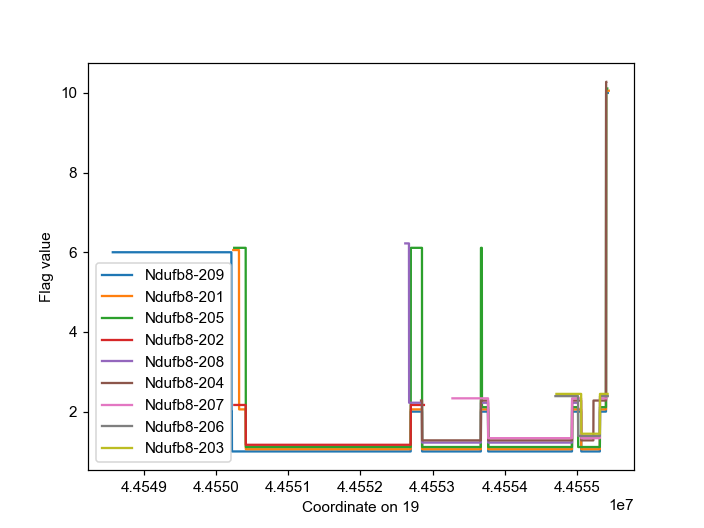

-- searching among 1 references
-- a match found in record: 19.
-- extracting transcript for id_transcript:ENSMUST00000171415_type_mRNA_strand_-_loc_19:44548572-44555426, size=2142
-- searching among 1 references
-- a match found in record: 19.
-- extracting transcript for id_transcript:ENSMUST00000026222_type_mRNA_strand_-_loc_19:44550240-44555440, size=680
-- searching among 1 references
-- a match found in record: 19.
-- extracting transcript for id_transcript:ENSMUST00000168083_type_mRNA_strand_-_loc_19:44550253-44555419, size=603
-- searching among 1 references
-- a match found in record: 19.
-- extracting transcript for id_transcript:ENSMUST00000164543_type_lnc_RNA_strand_-_loc_19:44550255-44552880, size=341
-- searching among 1 references
-- a match found in record: 19.
-- extracting transcript for id_transcript:ENSMUST00000169304_type_mRNA_strand_-_loc_19:44552622-44554986, size=388
-- searching among 1 references
-- a match found in record: 19.
-- extracting transcript for id_

In [652]:
mrna_dict = seq_rd.find_transcript_isoforms(gene_dict)

In [653]:
seq_rd.isoform_mRNA_dict

{'Ndufb8-209': SeqRecord(seq=Seq('AGAGTGAACCGCGGAGAAGGTGAAGATGGCTGCCGCCCGGGCTGCGGCCCTGGG...AGT'), id='id_transcript:ENSMUST00000171415_type_mRNA_strand_-_loc_19:44548572-44555426', name='', description='', dbxrefs=[]),
 'Ndufb8-201': SeqRecord(seq=Seq('TTTTGCGCATGTGCAGAGTGAACCGCGGAGAAGGTGAAGATGGCTGCCGCCCGG...GTT'), id='id_transcript:ENSMUST00000026222_type_mRNA_strand_-_loc_19:44550240-44555440', name='', description='', dbxrefs=[]),
 'Ndufb8-205': SeqRecord(seq=Seq('ACCGCGGAGAAGGTGAAGATGGCTGCCGCCCGGGCTGCGGCCCTGGGAGTCCGA...GCT'), id='id_transcript:ENSMUST00000168083_type_mRNA_strand_-_loc_19:44550253-44555419', name='', description='', dbxrefs=[]),
 'Ndufb8-202': SeqRecord(seq=Seq('TGACAGTTATGTGCCTTTCTGCCACAGATACACTGGGACCTAGACATGTACATC...AAG'), id='id_transcript:ENSMUST00000164543_type_lnc_RNA_strand_-_loc_19:44550255-44552880', name='', description='', dbxrefs=[]),
 'Ndufb8-208': SeqRecord(seq=Seq('AAGAAGTATAACATGCGAGTGGAAGACTACGAGCCATACCCCGATGATGGCATG...GTA'), id='id_transcript:ENSMU

<IPython.core.display.Javascript object>


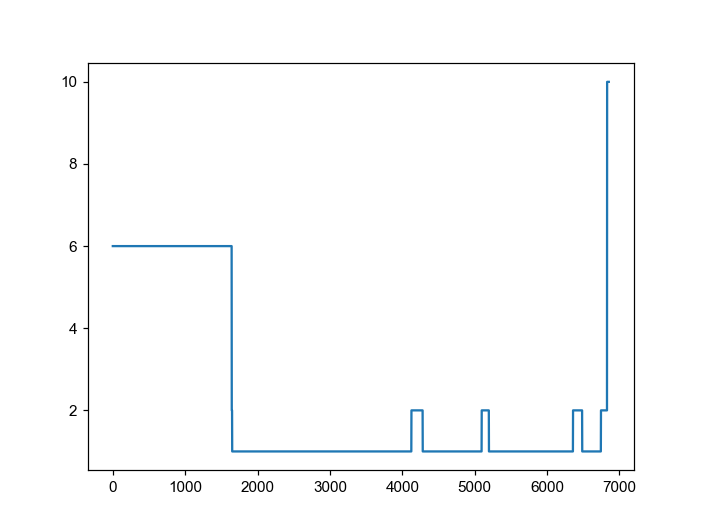

In [648]:
plt.figure()
plt.plot(exon_flags[0])

<IPython.core.display.Javascript object>


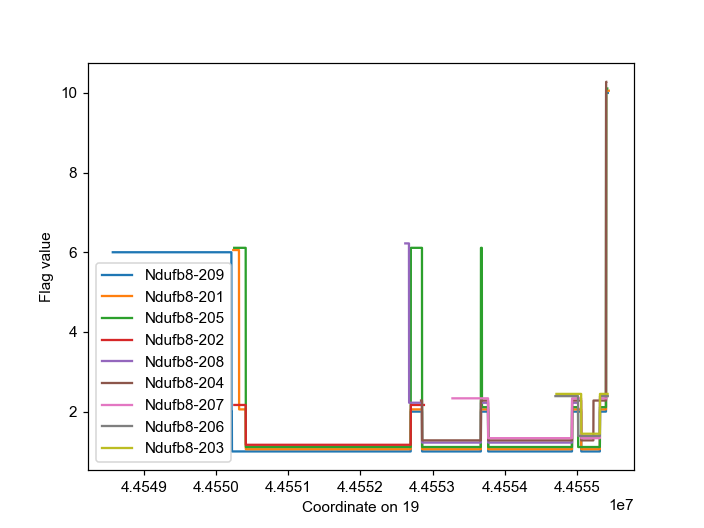

Ndufb8-209
-- searching among 1 references
-- a match found in record: 19.
2477
814
1161
258
Ndufb8-201
-- searching among 1 references
-- a match found in record: 19.
2285
814
1161
258
Ndufb8-205
-- searching among 1 references
-- a match found in record: 19.
2285
814
1161
301
Ndufb8-202
-- searching among 1 references
-- a match found in record: 19.
2285
Ndufb8-208
-- searching among 1 references
-- a match found in record: 19.
815
1161
Ndufb8-204
-- searching among 1 references
-- a match found in record: 19.
815
1161
168
Ndufb8-207
-- searching among 1 references
-- a match found in record: 19.
1162
258
Ndufb8-206
-- searching among 1 references
-- a match found in record: 19.
302
Ndufb8-203
-- searching among 1 references
-- a match found in record: 19.
259


In [649]:
intron_dict, exon_flags = find_introns_for_isoforms(seq_rd, gene_dict)

In [20]:
reload(library_tools.sequences)
region_file = os.path.join(library_folder, 'Super_enhancer_list_mTEC.bed')
region_dict = library_tools.sequences.read_region_file(region_file)
# add strand information
for _i in range(len(region_dict)):
    region_dict[_i]['Strand'] = '+'
records = library_tools.sequences.extract_sequence(region_dict, genome_folder, 
                                                   resolution=resolution,
                                                   flanking=flanking,
                                                   save_folder=sequence_folder)

Input region file is: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\Super_enhancer_list_mTEC.bed
- 966 regions loaded from file: Super_enhancer_list_mTEC.bed
-- searching among 23 references
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.1.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.14.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.6.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.16.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.6.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\L

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.7.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.c

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.14.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.6.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.1.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.17.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.18.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dn

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.15.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.3.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.7.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.9.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.9.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.15.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.9.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.c

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.6.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.3.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.1.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.19.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.17.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.10.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.14.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.13.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.d

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.7.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.7.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.19.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.6.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.c

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.3.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.15.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.12.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.6.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.18.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.10.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.14.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.3.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.15.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dn

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.1.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.1.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.10.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.12.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.10.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.18.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.9.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.16.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.7.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.10.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.2.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.3.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.5.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.6.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.9.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.ch

-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.9.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.1.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.4.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.11.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.14.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.chromosome.8.fa.
-- a match found in file: \\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl\Genome\Mus_musculus.GRCm38.dna.

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\15-chr5-17565-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\19-chr8-15670-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\16-chr7-17933-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\13-chr11-636-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\14-chr11-5021-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\11-chr16-472-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\18-chr15-14399-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Librari

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr16-32-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\9-chr18-7526-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr1-198-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\8-chr1-23055-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\9-chr5-17543-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\10-chr2-16995-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr14-9697-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr11-5024-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr9-4391-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr9-18171-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr9-2500-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr6-21733-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\8-chr11-1765-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr16-19253-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr4-19941-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr10-1529-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr11-1855-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr12-14160-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr2-13153-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr16-2829-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr13-14190-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\C

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr18-9829-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr8-20289-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr2-431-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr6-2314-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-20455-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr4-9275-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-22310-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-1

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr11-24971-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr15-7473-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-4722-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr4-158-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr9-15748-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr9-12484-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr5-8521-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-1

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr6-9365-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-18702-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr1-14711-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr9-3289-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr15-8115-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr1-19646-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr2-17071-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-10471-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr9-20331-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr10-12541-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr10-6756-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr13-8871-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr8-6677-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr7-4935-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr16-16503-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr17-9784-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr5-15322-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr17-14482-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr8-20284-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr16-22743-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr7-67-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr16-19309-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr11-14052-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr4-17451-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr13-2815-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr11-18662-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr11-7990-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr4-21432-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\

-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr14-7426-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr8-18052-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr16-19238-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr5-15261-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr12-5851-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr5-15326-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr3-12045-lociStitched_reg_1.fasta
-- save to file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CT

In [45]:
# calculate num of regions in each cluster
chr_2_region_num = {}
for _reg_info in region_dict:
    _chr_name = _reg_info['Chr']
    if 'chr' in _chr_name:
        _chr = _chr_name.split('chr')[1]
    else:
        _chr = _chr_name
    if _chr not in chr_2_region_num:
        chr_2_region_num[_chr] = 0
    chr_2_region_num[_chr] += 1
# save
pickle.dump(chr_2_region_num, open(os.path.join(library_folder,'chr_2_region_num.pkl'), 'wb'))

<a id='2'></a>
# 2. Design probe targeting sequences by probe_designer

run probe_designer, remeber to clear the memory usage because each table should take ~32GB

<a id='2.1'></a>
## 2.1 Construct count table with all the 17-mers in the genome

Only do this if you don't have pre-built 17-mer

However you can do almost the same thing for your own library during quality check

This library requires mm10 genome

In [21]:
overwrite_table = False

### construct map for whole genome

In [22]:
reload(library_tools.design)
 
genome_table_file = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')

if not os.path.exists(genome_table_file) or overwrite_table:
    # genome
    _genome_filenames = [os.path.join(genome_folder, _fl) 
         for _fl in os.listdir(genome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_genome_filenames))

    ct = library_tools.design.countTable(word=17,save_file=genome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_genome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()

    # clear RAM if contructed countable 
    del(ct)

### construct map for transcriptome

In [23]:
from tqdm import tqdm
# transcriptome
transcriptome_folder = os.path.join(reference_folder, 'Transcriptome')

transcriptome_table_file = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy')

if not os.path.exists(transcriptome_table_file) or overwrite_table:
    # transcriptome
    _transcriptome_filenames = [os.path.join(transcriptome_folder, _fl) 
         for _fl in os.listdir(transcriptome_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_transcriptome_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=transcriptome_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_transcriptome_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)

### construct map for repeats from RepBase

In [24]:
from tqdm import tqdm
# repeat
repeat_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\Repbase'

repeat_table_file = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')

if not os.path.exists(repeat_table_file) or overwrite_table:
    # repeat
    _repeat_filenames = [os.path.join(repeat_folder, _fl) 
         for _fl in os.listdir(repeat_folder) 
         if _fl.split(os.extsep)[-1]=='fasta' or _fl.split(os.extsep)[-1]=='fa']
    print(len(_repeat_filenames))
    
    ct = library_tools.design.countTable(word=17,save_file=repeat_table_file, 
                       sparse=False)
    ct.verbose=True

    ct.read(_repeat_filenames) # read sequences from fasta files

    ct.consume_loaded(num_threads=24) # convert sequences into integers

    ct.complete(verbose=True)

    ct.save()
    
    # clear RAM if contructed countable 
    del(ct)

<a id='2.2'></a>
## 2.2 Design probes

In [26]:
# required parameters
resolution = 0

## required folders
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire'

library_folder = os.path.join(pool_folder, f'SuperEnhancers')
sequence_folder = os.path.join(library_folder, 'sequences')
report_folder = os.path.join(library_folder, 'reports')

In [27]:
# requires pre_defined genome_folder and library_folder
# Indices
genome_index = os.path.join(reference_folder, 'GRCm38_genome_17w.npy')
transcriptome_index = os.path.join(reference_folder, 'GRCm38_transcriptome_17w.npy') 
repeat_index = os.path.join(reference_folder, 'Repbase_v2603_repeat_17w.npy')
#ref_merfish_index = os.path.join(reference_folder, 'M1_meng_MERFISH_17w.npy') # merfish designed by Meng
# get input files 
input_files = glob.glob(os.path.join(sequence_folder, '*.fasta'))

print(f"{len(input_files)} regions loaded to design probes.")

if not os.path.exists(report_folder):
    os.makedirs(report_folder)
    
# filename to save probe reports
save_file = os.path.join(report_folder, f'merged_probes.pbr')
print(save_file)

966 regions loaded to design probes.
\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\reports\merged_probes.pbr


### create pb_designer class

In [31]:
reload(library_tools)
reload(library_tools.design)

pb_designer = library_tools.design.pb_reports_class(
    sequence_dic={'file':input_files,
                  'rev_com':True, # design two strands
                  'two_stranded':True},
    map_dic={'genome':{'file':genome_index,'rev_com':False,'two_stranded':True},
             'transcriptome':{'file':transcriptome_index,'rev_com':True,'two_stranded':False},
             'rep_genome':{'file':repeat_index,'rev_com':False,'two_stranded':True},
             'self_sequences':{'file':input_files,'force_list':True,'rev_com':False,'two_stranded':True},
             #'ref_merfish':{'file':ref_merfish_index,'rev_com':False,'two_stranded':True},
             },
        save_file=save_file,
    params_dic={'word_size':17,'pb_len':40,'buffer_len':1,'max_count':2**16-1,
                'check_on_go': False, # whether automatically check probes
                'auto': False, # whether automatically convert reference maps
               },
    check_dic={('genome','self_sequences'): 25,
               'rep_genome': 0,
               'transcriptome': 14,
               #'ref_merfish': 14,
               'gc':[0.25,0.85],'tm': 70,
               }
    )
print(pb_designer)
pb_designer.load_from_file(load_probes_only=True)


Probe designer derived from Bogdan Bintu:
https://github.com/BogdanBintu/ChromatinImaging/blob/master/LibraryDesign/LibraryDesigner.py
by Pu Zheng, 2020.11

Major changes:
    1. allow design of two strands
    2. separate reverse_complement (rev_com) and from two strands (two_stranded) as 
    two different inputs for map_dic and sequence_dic
    3. replace 'local_genome' with 'self_sequences' to be more explicit, and only 
    exclude the counts for the corresponding self_sequence within each input. 

Key information:
    - number of input_sequence(s): 966
    - save_file location: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\reports\merged_probes.pbr

- Fail to load from savefile: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\reports\merged_probes.pbr, file doesn't exist.


False

### calculate probe reports

In [32]:
reload(library_tools)
reload(library_tools.design)
pb_designer.computeOTmaps() # load the tables 
pb_designer.compute_pb_report() # design candidate probes

-- setting attribute: map_genome
--- finish map_genome in 93.368s.
-- setting attribute: map_transcriptome
--- finish map_transcriptome in 103.512s.
-- setting attribute: map_rep_genome
--- finish map_rep_genome in 84.652s.
Time(s): 281.53144097328186
- Designing targeting sequence for 966 regions
-- designing region: 1:189744530-189852686_reg_20-chr1-6997-lociStitched 0, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\20-chr1-6997-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.335s.
in 57.107s.
-- designing region: 14:74843823-74948405_reg_19-chr14-16350-lociStitched 1, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\19-chr14-16350-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.334s.
in 55.852s.
-- designing region: 6:134111442-134196730_reg_17-

--- finish map_self_sequences in 0.254s.
in 44.240s.
-- designing region: 9:43743376-43795105_reg_12-chr9-24618-lociStitched 25, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\12-chr9-24618-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.190s.
in 29.841s.
-- designing region: 8:117299480-117349911_reg_12-chr8-9480-lociStitched 26, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\12-chr8-9480-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.198s.
in 27.273s.
-- designing region: 3:135575643-135646672_reg_12-chr3-9253-lociStitched 27, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\12-chr3-9253-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_seque

in 28.077s.
-- designing region: 11:100887913-100941165_reg_13-chr11-18648-lociStitched 51, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\13-chr11-18648-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.210s.
in 28.590s.
-- designing region: 18:20536576-20594819_reg_10-chr18-14559-lociStitched 52, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\10-chr18-14559-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
in 31.188s.
-- designing region: 18:49976863-50044388_reg_13-chr18-11736-lociStitched 53, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\13-chr18-11736-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.206s.
in 36.107s.
--

--- finish map_self_sequences in 0.223s.
in 41.575s.
-- designing region: 2:33223692-33271102_reg_10-chr2-16995-lociStitched 77, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\10-chr2-16995-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.172s.
in 25.604s.
-- designing region: 14:7883104-7934529_reg_7-chr14-9697-lociStitched 78, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr14-9697-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.181s.
in 32.252s.
-- designing region: 8:126816810-126857356_reg_7-chr8-20297-lociStitched 79, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr8-20297-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequence

--- finish map_self_sequences in 0.204s.
in 29.844s.
-- designing region: 10:78121402-78147264_reg_4-chr10-52-lociStitched 103, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr10-52-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 14.169s.
-- designing region: 7:109577271-109620122_reg_8-chr7-3274-lociStitched 104, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\8-chr7-3274-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
in 28.770s.
-- designing region: 11:107318355-107368732_reg_8-chr11-14077-lociStitched 105, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\8-chr11-14077-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequen

in 21.010s.
-- designing region: 4:123785631-123827302_reg_8-chr4-23729-lociStitched 129, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\8-chr4-23729-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.162s.
in 22.452s.
-- designing region: 4:128973110-129022596_reg_9-chr4-11002-lociStitched 130, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\9-chr4-11002-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.172s.
in 26.792s.
-- designing region: 5:134945641-134987422_reg_8-chr5-9352-lociStitched 131, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\8-chr5-9352-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 22.494s.
-- designing

in 24.416s.
-- designing region: 9:110646579-110689138_reg_7-chr9-24743-lociStitched 155, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr9-24743-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.154s.
in 22.943s.
-- designing region: 3:152447546-152495900_reg_5-chr3-6524-lociStitched 156, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr3-6524-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.164s.
in 26.110s.
-- designing region: 10:78038061-78052799_reg_chr10-2 157, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\chr10-2_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 8.344s.
-- designing region: 1:36055548-36106254_reg_8-chr

in 28.609s.
-- designing region: 9:40316974-40363107_reg_7-chr9-4391-lociStitched 181, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr9-4391-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.172s.
in 24.832s.
-- designing region: 9:21425901-21469130_reg_5-chr9-18171-lociStitched 182, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr9-18171-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.162s.
in 23.235s.
-- designing region: 9:66241312-66286238_reg_7-chr9-2500-lociStitched 183, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr9-2500-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.162s.
in 24.186s.
-- designing region:

in 20.981s.
-- designing region: 15:25621059-25658928_reg_5-chr15-10603-lociStitched 207, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr15-10603-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.162s.
in 20.539s.
-- designing region: 11:87796701-87834800_reg_5-chr11-5822-lociStitched 208, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-5822-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 20.588s.
-- designing region: 7:28561800-28596508_reg_5-chr7-12304-lociStitched 209, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr7-12304-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 18.872s.
-- designing

in 21.010s.
-- designing region: 11:8604192-8645117_reg_10-chr11-10420-lociStitched 233, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\10-chr11-10420-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 22.113s.
-- designing region: 5:147044421-147078968_reg_6-chr5-2304-lociStitched 234, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr5-2304-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 18.751s.
-- designing region: 6:94236075-94284075_reg_5-chr6-15420-lociStitched 235, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr6-15420-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.182s.
in 26.710s.
-- designing 

in 22.856s.
-- designing region: 9:70232801-70281917_reg_7-chr9-7910-lociStitched 259, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr9-7910-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.174s.
in 26.413s.
-- designing region: 6:134337342-134382414_reg_5-chr6-13626-lociStitched 260, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr6-13626-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.172s.
in 24.277s.
-- designing region: 7:98791591-98822385_reg_7-chr7-20193-lociStitched 261, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\7-chr7-20193-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.134s.
in 16.795s.
-- designing reg

in 16.654s.
-- designing region: 5:114944961-114985111_reg_4-chr5-17603-lociStitched 285, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr5-17603-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 21.678s.
-- designing region: 9:21708636-21735629_reg_3-chr9-15729-lociStitched 286, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr9-15729-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 15.223s.
-- designing region: 15:79084397-79125907_reg_6-chr15-11617-lociStitched 287, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr15-11617-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.170s.
in 22.453s.
-- designin

in 17.516s.
-- designing region: 6:29828130-29855904_reg_5-chr6-7166-lociStitched 311, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr6-7166-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.123s.
in 15.125s.
-- designing region: 4:139919082-139943790_reg_3-chr4-7722-lociStitched 312, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr4-7722-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.118s.
in 13.565s.
-- designing region: 14:40916006-40939221_reg_6-chr14-16318-lociStitched 313, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr14-16318-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.111s.
in 12.738s.
-- designing re

in 16.007s.
-- designing region: 4:62724690-62752142_reg_5-chr4-6534-lociStitched 337, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr4-6534-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.131s.
in 15.073s.
-- designing region: 11:65133591-65157409_reg_4-chr11-985-lociStitched 338, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr11-985-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.110s.
-- designing region: 10:7806290-7843884_reg_6-chr10-22105-lociStitched 339, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr10-22105-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.154s.
in 20.319s.
-- designing regio

in 16.885s.
-- designing region: 11:44508915-44546052_reg_5-chr11-24985-lociStitched 363, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-24985-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 20.098s.
-- designing region: 2:124612497-124647915_reg_4-chr2-3048-lociStitched 364, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr2-3048-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.144s.
in 19.241s.
-- designing region: 9:103027805-103058640_reg_3-chr9-13855-lociStitched 365, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr9-13855-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.131s.
in 16.783s.
-- designin

in 19.783s.
-- designing region: 5:140193782-140224596_reg_5-chr5-17657-lociStitched 389, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr5-17657-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.162s.
in 16.815s.
-- designing region: 6:134828306-134853229_reg_6-chr6-288-lociStitched 390, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr6-288-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.692s.
-- designing region: 7:139898678-139928142_reg_4-chr7-24392-lociStitched 391, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr7-24392-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 16.560s.
-- designing r

in 16.926s.
-- designing region: 10:43985207-44008635_reg_4-chr10-1221-lociStitched 415, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr10-1221-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.119s.
in 12.890s.
-- designing region: 8:106601179-106625337_reg_4-chr8-1840-lociStitched 416, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr8-1840-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.245s.
-- designing region: 6:51528583-51558857_reg_3-chr6-15390-lociStitched 417, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr6-15390-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.131s.
in 16.479s.
-- designing re

in 12.981s.
-- designing region: 12:104830670-104859377_reg_3-chr12-7401-lociStitched 441, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr12-7401-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.123s.
in 15.644s.
-- designing region: 1:151934433-151970502_reg_5-chr1-23095-lociStitched 442, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr1-23095-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.150s.
in 19.517s.
-- designing region: 2:128297284-128344842_reg_5-chr2-8339-lociStitched 443, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr2-8339-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.174s.
in 25.569s.
-- designin

in 16.861s.
-- designing region: 15:83430249-83458855_reg_3-chr15-8124-lociStitched 467, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr15-8124-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 15.646s.
-- designing region: 10:108431000-108459142_reg_4-chr10-22187-lociStitched 468, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr10-22187-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.131s.
in 15.366s.
-- designing region: 6:89580451-89615314_reg_4-chr6-17737-lociStitched 469, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr6-17737-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 36.001s.
-- designi

in 20.090s.
-- designing region: 4:106976364-107010461_reg_5-chr4-15158-lociStitched 493, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr4-15158-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.153s.
in 18.565s.
-- designing region: 1:59423596-59454904_reg_6-chr1-10777-lociStitched 494, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\6-chr1-10777-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.140s.
in 17.035s.
-- designing region: 8:80828859-80853439_reg_4-chr8-2490-lociStitched 495, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr8-2490-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.518s.
-- designing reg

in 13.824s.
-- designing region: 14:61394339-61420948_reg_4-chr14-1410-lociStitched 519, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr14-1410-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 14.582s.
-- designing region: 3:108839101-108861400_reg_4-chr3-2454-lociStitched 520, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr3-2454-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 12.342s.
-- designing region: 4:57120589-57145551_reg_5-chr4-8432-lociStitched 521, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr4-8432-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.736s.
-- designing regi

in 16.048s.
-- designing region: 2:117346450-117366726_reg_3-chr2-17071-lociStitched 545, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr2-17071-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.111s.
in 11.239s.
-- designing region: 15:78507072-78531821_reg_3-chr15-7467-lociStitched 546, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr15-7467-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.113s.
in 13.560s.
-- designing region: 9:107716276-107741223_reg_3-chr9-8711-lociStitched 547, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr9-8711-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.113s.
in 13.691s.
-- designing 

in 16.684s.
-- designing region: 18:75991395-76019279_reg_3-chr18-1554-lociStitched 571, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr18-1554-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 15.289s.
-- designing region: 10:78293664-78326084_reg_4-chr10-18419-lociStitched 572, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr10-18419-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 17.667s.
-- designing region: 5:134240000-134258051_reg_3-chr5-10157-lociStitched 573, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr5-10157-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.123s.
in 10.099s.
-- designi

in 10.601s.
-- designing region: 5:32316991-32348646_reg_4-chr5-17505-lociStitched 597, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr5-17505-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 17.276s.
-- designing region: 17:84400767-84426008_reg_4-chr17-5479-lociStitched 598, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr17-5479-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.119s.
in 13.859s.
-- designing region: 7:16393485-16411882_reg_2-chr7-194-lociStitched 599, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr7-194-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.109s.
in 10.258s.
-- designing region

in 16.644s.
-- designing region: 15:31423874-31452411_reg_5-chr15-11599-lociStitched 623, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr15-11599-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.129s.
in 15.530s.
-- designing region: 4:105198095-105227710_reg_3-chr4-23688-lociStitched 624, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr4-23688-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 16.108s.
-- designing region: 11:62860459-62883110_reg_4-chr11-15990-lociStitched 625, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr11-15990-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 12.455s.
-- desig

in 9.340s.
-- designing region: 19:44240692-44259358_reg_3-chr19-58-lociStitched 649, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr19-58-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.111s.
in 10.361s.
-- designing region: 2:32413408-32433605_reg_3-chr2-4558-lociStitched 650, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr2-4558-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.111s.
in 11.187s.
-- designing region: 1:119491335-119523670_reg_3-chr1-16842-lociStitched 651, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr1-16842-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 17.556s.
-- designing region:

in 7.837s.
-- designing region: 9:40625442-40655479_reg_4-chr9-6226-lociStitched 675, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr9-6226-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 16.327s.
-- designing region: 6:134205345-134226383_reg_4-chr6-11145-lociStitched 676, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr6-11145-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 11.603s.
-- designing region: 3:135668650-135693695_reg_3-chr3-9255-lociStitched 677, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr3-9255-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.134s.
in 13.736s.
-- designing regi

in 17.113s.
-- designing region: 4:155173248-155207899_reg_4-chr4-8484-lociStitched 701, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr4-8484-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 18.835s.
-- designing region: 2:71785083-71819645_reg_5-chr2-14872-lociStitched 702, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr2-14872-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.162s.
in 18.786s.
-- designing region: 11:119177516-119229276_reg_5-chr11-16101-lociStitched 703, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr11-16101-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.215s.
in 27.838s.
-- designin

in 12.323s.
-- designing region: 5:125086968-125113640_reg_4-chr5-15322-lociStitched 727, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr5-15322-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.132s.
in 14.668s.
-- designing region: 17:5045085-5068587_reg_3-chr17-14482-lociStitched 728, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr17-14482-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 12.930s.
-- designing region: 8:117239719-117268063_reg_4-chr8-20284-lociStitched 729, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr8-20284-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.132s.
in 15.461s.
-- designin

in 15.791s.
-- designing region: 9:70767356-70793904_reg_3-chr9-15779-lociStitched 753, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr9-15779-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.131s.
in 14.520s.
-- designing region: 4:89369083-89399970_reg_3-chr4-1650-lociStitched 754, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr4-1650-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.142s.
in 16.815s.
-- designing region: 19:32285080-32310180_reg_3-chr19-2148-lociStitched 755, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr19-2148-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.732s.
-- designing regi

in 14.236s.
-- designing region: 2:84954977-84970159_reg_2-chr2-75-lociStitched 779, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr2-75-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.111s.
in 8.559s.
-- designing region: 12:5332249-5356379_reg_3-chr12-10494-lociStitched 780, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr12-10494-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.119s.
in 13.224s.
-- designing region: 4:126807398-126828972_reg_2-chr4-6099-lociStitched 781, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr4-6099-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.111s.
in 11.908s.
-- designing region: 1

in 11.070s.
-- designing region: 6:128832935-128861586_reg_3-chr6-4351-lociStitched 805, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr6-4351-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.131s.
in 15.626s.
-- designing region: 8:122907402-122941706_reg_5-chr8-9484-lociStitched 806, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\5-chr8-9484-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.154s.
in 18.624s.
-- designing region: 10:58352926-58374360_reg_2-chr10-4994-lociStitched 807, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr10-4994-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.111s.
in 11.828s.
-- designing re

in 13.120s.
-- designing region: 11:8669425-8691797_reg_4-chr11-20435-lociStitched 831, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr11-20435-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.123s.
in 12.374s.
-- designing region: 15:58360264-58387618_reg_3-chr15-2545-lociStitched 832, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr15-2545-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.132s.
in 14.987s.
-- designing region: 4:149587784-149614683_reg_3-chr4-1372-lociStitched 833, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr4-1372-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.132s.
in 14.745s.
-- designing r

in 12.340s.
-- designing region: 4:57852787-57878071_reg_4-chr4-21425-lociStitched 857, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr4-21425-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.892s.
-- designing region: 9:104859758-104891842_reg_4-chr9-24731-lociStitched 858, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr9-24731-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 17.460s.
-- designing region: 14:11928525-11964106_reg_4-chr14-25477-lociStitched 859, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr14-25477-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.152s.
in 19.373s.
-- designin

in 13.024s.
-- designing region: 11:109568555-109590006_reg_3-chr11-16077-lociStitched 883, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr11-16077-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 11.932s.
-- designing region: 19:10684041-10698959_reg_2-chr19-100-lociStitched 884, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr19-100-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.109s.
in 8.441s.
-- designing region: 6:51327990-51352930_reg_3-chr6-7173-lociStitched 885, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr6-7173-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.121s.
in 13.727s.
-- designing re

in 10.298s.
-- designing region: 11:97803472-97825839_reg_4-chr11-6274-lociStitched 909, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr11-6274-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.129s.
in 12.386s.
-- designing region: 9:123920646-123945507_reg_3-chr9-11324-lociStitched 910, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr9-11324-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.122s.
in 12.404s.
-- designing region: 1:34012248-34038735_reg_3-chr1-14666-lociStitched 911, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr1-14666-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.124s.
in 14.512s.
-- designing 

in 10.416s.
-- designing region: 5:36367906-36386626_reg_4-chr5-1514-lociStitched 935, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr5-1514-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.101s.
in 10.417s.
-- designing region: 16:35231606-35254041_reg_4-chr16-11666-lociStitched 936, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr16-11666-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.126s.
in 12.432s.
-- designing region: 18:84032430-84056502_reg_2-chr18-1426-lociStitched 937, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\2-chr18-1426-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.132s.
in 13.284s.
-- designing r

in 8.772s.
-- designing region: 4:94852235-94870092_reg_3-chr4-417-lociStitched 961, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\3-chr4-417-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.119s.
in 9.954s.
-- designing region: 2:18892636-18924429_reg_4-chr2-23182-lociStitched 962, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr2-23182-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.144s.
in 17.279s.
-- designing region: 13:24462677-24493323_reg_4-chr13-5398-lociStitched 963, input file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\sequences\4-chr13-5398-lociStitched_reg_1.fasta
-- setting attribute: map_self_sequences
- Mapping no. of seqs: 1
--- finish map_self_sequences in 0.141s.
in 16.792s.
-- designing region: 

### check probes

In [33]:
pbs, pb_scores = pb_designer.check_probes()

-- check region:0 1:189744530-189852686_reg_20-chr1-6997-lociStitched, 213674 candidate probes
--- 115091 probes passed check_dic, GC and Tm selection.
finish in 8.727s, 1614 probes kept.
-- check region:1 14:74843823-74948405_reg_19-chr14-16350-lociStitched, 202212 candidate probes
--- 101860 probes passed check_dic, GC and Tm selection.
finish in 7.887s, 1471 probes kept.
-- check region:2 6:134111442-134196730_reg_17-chr6-21729-lociStitched, 169340 candidate probes
--- 95601 probes passed check_dic, GC and Tm selection.
finish in 6.989s, 1298 probes kept.
-- check region:3 16:10429893-10512397_reg_18-chr16-1616-lociStitched, 160944 candidate probes
--- 72797 probes passed check_dic, GC and Tm selection.
finish in 5.945s, 1095 probes kept.
-- check region:4 6:91964691-92049798_reg_19-chr6-17740-lociStitched, 167508 candidate probes
--- 93304 probes passed check_dic, GC and Tm selection.
finish in 6.876s, 1289 probes kept.
-- check region:5 5:96850351-96928237_reg_15-chr5-17565-lociSt

-- check region:44 12:99314934-99374423_reg_11-chr12-2380-lociStitched, 117352 candidate probes
--- 70419 probes passed check_dic, GC and Tm selection.
finish in 5.016s, 933 probes kept.
-- check region:45 2:60786099-60845297_reg_12-chr2-8319-lociStitched, 116788 candidate probes
--- 68393 probes passed check_dic, GC and Tm selection.
finish in 4.846s, 904 probes kept.
-- check region:46 5:96975046-97040658_reg_10-chr5-7148-lociStitched, 129290 candidate probes
--- 62032 probes passed check_dic, GC and Tm selection.
finish in 4.836s, 930 probes kept.
-- check region:47 16:11355811-11409642_reg_10-chr16-14422-lociStitched, 103938 candidate probes
--- 47146 probes passed check_dic, GC and Tm selection.
finish in 3.922s, 680 probes kept.
-- check region:48 2:165847652-165892750_reg_6-chr2-11986-lociStitched, 88024 candidate probes
--- 44821 probes passed check_dic, GC and Tm selection.
finish in 3.500s, 664 probes kept.
-- check region:49 11:54899225-54946098_reg_9-chr11-3900-lociStitched

--- 55449 probes passed check_dic, GC and Tm selection.
finish in 4.230s, 818 probes kept.
-- check region:89 6:134688544-134738163_reg_10-chr6-3467-lociStitched, 93346 candidate probes
--- 43492 probes passed check_dic, GC and Tm selection.
finish in 3.591s, 657 probes kept.
-- check region:90 5:125118914-125164971_reg_7-chr5-386-lociStitched, 90872 candidate probes
--- 54231 probes passed check_dic, GC and Tm selection.
finish in 3.857s, 697 probes kept.
-- check region:91 12:75705453-75748019_reg_9-chr12-763-lociStitched, 82458 candidate probes
--- 28493 probes passed check_dic, GC and Tm selection.
finish in 2.683s, 506 probes kept.
-- check region:92 8:122974978-123028466_reg_10-chr8-7886-lociStitched, 104236 candidate probes
--- 45195 probes passed check_dic, GC and Tm selection.
finish in 3.723s, 683 probes kept.
-- check region:93 10:80660569-80703684_reg_8-chr10-5001-lociStitched, 83894 candidate probes
--- 41609 probes passed check_dic, GC and Tm selection.
finish in 3.289s, 

--- 45489 probes passed check_dic, GC and Tm selection.
finish in 3.217s, 605 probes kept.
-- check region:133 1:171419880-171472060_reg_8-chr1-3219-lociStitched, 99710 candidate probes
--- 39396 probes passed check_dic, GC and Tm selection.
finish in 3.519s, 623 probes kept.
-- check region:134 16:91516576-91568080_reg_6-chr16-22765-lociStitched, 98858 candidate probes
--- 46991 probes passed check_dic, GC and Tm selection.
finish in 3.784s, 684 probes kept.
-- check region:135 5:66052060-66091950_reg_8-chr5-13478-lociStitched, 77750 candidate probes
--- 35745 probes passed check_dic, GC and Tm selection.
finish in 2.885s, 535 probes kept.
-- check region:136 8:3207865-3258490_reg_8-chr8-11222-lociStitched, 99932 candidate probes
--- 40165 probes passed check_dic, GC and Tm selection.
finish in 3.642s, 661 probes kept.
-- check region:137 11:4257302-4313419_reg_6-chr11-20426-lociStitched, 111774 candidate probes
--- 64147 probes passed check_dic, GC and Tm selection.
finish in 4.684s,

finish in 2.856s, 555 probes kept.
-- check region:177 6:113636468-113676161_reg_5-chr6-63-lociStitched, 77156 candidate probes
--- 32897 probes passed check_dic, GC and Tm selection.
finish in 2.790s, 500 probes kept.
-- check region:178 19:47386106-47422852_reg_5-chr19-7547-lociStitched, 72904 candidate probes
--- 40389 probes passed check_dic, GC and Tm selection.
finish in 2.954s, 528 probes kept.
-- check region:179 14:73363424-73394215_reg_6-chr14-19055-lociStitched, 61154 candidate probes
--- 30223 probes passed check_dic, GC and Tm selection.
finish in 2.370s, 441 probes kept.
-- check region:180 11:94146189-94199648_reg_7-chr11-5024-lociStitched, 103424 candidate probes
--- 51351 probes passed check_dic, GC and Tm selection.
finish in 3.966s, 713 probes kept.
-- check region:181 9:40316974-40363107_reg_7-chr9-4391-lociStitched, 91768 candidate probes
--- 55150 probes passed check_dic, GC and Tm selection.
finish in 3.914s, 733 probes kept.
-- check region:182 9:21425901-214691

-- check region:221 12:71837848-71876286_reg_5-chr12-14145-lociStitched, 76004 candidate probes
--- 40507 probes passed check_dic, GC and Tm selection.
finish in 3.042s, 561 probes kept.
-- check region:222 9:58093461-58119667_reg_3-chr9-24652-lociStitched, 52178 candidate probes
--- 28370 probes passed check_dic, GC and Tm selection.
finish in 2.236s, 410 probes kept.
-- check region:223 1:36549814-36578690_reg_4-chr1-8254-lociStitched, 57494 candidate probes
--- 31802 probes passed check_dic, GC and Tm selection.
finish in 2.358s, 470 probes kept.
-- check region:224 15:83128854-83172292_reg_7-chr15-14391-lociStitched, 83896 candidate probes
--- 41388 probes passed check_dic, GC and Tm selection.
finish in 3.215s, 609 probes kept.
-- check region:225 17:26681655-26715258_reg_5-chr17-849-lociStitched, 65434 candidate probes
--- 31575 probes passed check_dic, GC and Tm selection.
finish in 2.562s, 472 probes kept.
-- check region:226 11:116422073-116448709_reg_5-chr11-12673-lociStitche

--- 31123 probes passed check_dic, GC and Tm selection.
finish in 2.214s, 425 probes kept.
-- check region:266 1:105785839-105825620_reg_8-chr1-10787-lociStitched, 78432 candidate probes
--- 38115 probes passed check_dic, GC and Tm selection.
finish in 3.022s, 555 probes kept.
-- check region:267 15:27620551-27655644_reg_5-chr15-2997-lociStitched, 66516 candidate probes
--- 29748 probes passed check_dic, GC and Tm selection.
finish in 2.567s, 453 probes kept.
-- check region:268 7:15987448-16020116_reg_7-chr7-8579-lociStitched, 62978 candidate probes
--- 26544 probes passed check_dic, GC and Tm selection.
finish in 2.276s, 411 probes kept.
-- check region:269 4:105240167-105271792_reg_5-chr4-19941-lociStitched, 61972 candidate probes
--- 34841 probes passed check_dic, GC and Tm selection.
finish in 2.567s, 459 probes kept.
-- check region:270 10:75299452-75335990_reg_5-chr10-1529-lociStitched, 72436 candidate probes
--- 43547 probes passed check_dic, GC and Tm selection.
finish in 3.14

finish in 2.499s, 498 probes kept.
-- check region:310 11:77778795-77811045_reg_6-chr11-1400-lociStitched, 62832 candidate probes
--- 30692 probes passed check_dic, GC and Tm selection.
finish in 2.468s, 445 probes kept.
-- check region:311 6:29828130-29855904_reg_5-chr6-7166-lociStitched, 53968 candidate probes
--- 24013 probes passed check_dic, GC and Tm selection.
finish in 1.986s, 365 probes kept.
-- check region:312 4:139919082-139943790_reg_3-chr4-7722-lociStitched, 48418 candidate probes
--- 18636 probes passed check_dic, GC and Tm selection.
finish in 1.751s, 304 probes kept.
-- check region:313 14:40916006-40939221_reg_6-chr14-16318-lociStitched, 46264 candidate probes
--- 26396 probes passed check_dic, GC and Tm selection.
finish in 1.973s, 360 probes kept.
-- check region:314 13:51727900-51761618_reg_5-chr13-18884-lociStitched, 66504 candidate probes
--- 37390 probes passed check_dic, GC and Tm selection.
finish in 2.732s, 504 probes kept.
-- check region:315 2:91447771-9148

-- check region:354 14:118666791-118697744_reg_3-chr14-8941-lociStitched, 60670 candidate probes
--- 35607 probes passed check_dic, GC and Tm selection.
finish in 3.123s, 460 probes kept.
-- check region:355 13:108331441-108356930_reg_3-chr13-25-lociStitched, 50132 candidate probes
--- 22164 probes passed check_dic, GC and Tm selection.
finish in 2.229s, 297 probes kept.
-- check region:356 18:32386290-32418924_reg_4-chr18-9829-lociStitched, 64684 candidate probes
--- 32759 probes passed check_dic, GC and Tm selection.
finish in 3.102s, 460 probes kept.
-- check region:357 8:120359261-120388898_reg_4-chr8-20289-lociStitched, 58492 candidate probes
--- 33119 probes passed check_dic, GC and Tm selection.
finish in 2.787s, 451 probes kept.
-- check region:358 2:91657764-91683098_reg_4-chr2-431-lociStitched, 49606 candidate probes
--- 21933 probes passed check_dic, GC and Tm selection.
finish in 2.139s, 350 probes kept.
-- check region:359 6:115936689-115964284_reg_4-chr6-2314-lociStitched

--- 35585 probes passed check_dic, GC and Tm selection.
finish in 2.949s, 450 probes kept.
-- check region:399 10:121487367-121521482_reg_6-chr10-6254-lociStitched, 65254 candidate probes
--- 28574 probes passed check_dic, GC and Tm selection.
finish in 3.053s, 413 probes kept.
-- check region:400 5:135926837-135967382_reg_5-chr5-211-lociStitched, 77810 candidate probes
--- 28264 probes passed check_dic, GC and Tm selection.
finish in 3.415s, 478 probes kept.
-- check region:401 14:101829153-101858699_reg_4-chr14-16365-lociStitched, 58464 candidate probes
--- 30131 probes passed check_dic, GC and Tm selection.
finish in 2.718s, 431 probes kept.
-- check region:402 13:48949583-48984337_reg_4-chr13-6321-lociStitched, 68358 candidate probes
--- 30466 probes passed check_dic, GC and Tm selection.
finish in 2.910s, 453 probes kept.
-- check region:403 14:40889850-40910790_reg_3-chr14-202-lociStitched, 41164 candidate probes
--- 24164 probes passed check_dic, GC and Tm selection.
finish in 1

finish in 3.558s, 544 probes kept.
-- check region:443 2:128297284-128344842_reg_5-chr2-8339-lociStitched, 93134 candidate probes
--- 41730 probes passed check_dic, GC and Tm selection.
finish in 4.099s, 672 probes kept.
-- check region:444 11:31876364-31903113_reg_6-chr11-24971-lociStitched, 53008 candidate probes
--- 24296 probes passed check_dic, GC and Tm selection.
finish in 2.311s, 365 probes kept.
-- check region:445 15:81735968-81766143_reg_3-chr15-7473-lociStitched, 58614 candidate probes
--- 25625 probes passed check_dic, GC and Tm selection.
finish in 2.425s, 360 probes kept.
-- check region:446 11:108227545-108253654_reg_5-chr11-4722-lociStitched, 51774 candidate probes
--- 30741 probes passed check_dic, GC and Tm selection.
finish in 2.665s, 409 probes kept.
-- check region:447 4:57935408-57959261_reg_4-chr4-158-lociStitched, 47506 candidate probes
--- 23382 probes passed check_dic, GC and Tm selection.
finish in 2.240s, 323 probes kept.
-- check region:448 9:45236609-4526

-- check region:487 11:54797772-54852167_reg_5-chr11-25016-lociStitched, 105940 candidate probes
--- 38677 probes passed check_dic, GC and Tm selection.
finish in 4.205s, 648 probes kept.
-- check region:488 5:139653114-139684858_reg_4-chr5-23999-lociStitched, 61464 candidate probes
--- 32493 probes passed check_dic, GC and Tm selection.
finish in 2.991s, 443 probes kept.
-- check region:489 4:154890665-154918375_reg_3-chr4-19989-lociStitched, 54032 candidate probes
--- 26899 probes passed check_dic, GC and Tm selection.
finish in 2.515s, 384 probes kept.
-- check region:490 12:102047558-102074509_reg_3-chr12-1083-lociStitched, 52428 candidate probes
--- 27406 probes passed check_dic, GC and Tm selection.
finish in 2.413s, 387 probes kept.
-- check region:491 8:13589364-13614929_reg_3-chr8-24420-lociStitched, 49892 candidate probes
--- 31497 probes passed check_dic, GC and Tm selection.
finish in 2.536s, 401 probes kept.
-- check region:492 9:40752818-40789889_reg_4-chr9-22010-lociStit

--- 18267 probes passed check_dic, GC and Tm selection.
finish in 1.796s, 297 probes kept.
-- check region:532 13:52019553-52054679_reg_4-chr13-9682-lociStitched, 68030 candidate probes
--- 33239 probes passed check_dic, GC and Tm selection.
finish in 3.194s, 456 probes kept.
-- check region:533 14:79867000-79895439_reg_3-chr14-19067-lociStitched, 56248 candidate probes
--- 32074 probes passed check_dic, GC and Tm selection.
finish in 2.680s, 438 probes kept.
-- check region:534 2:68370870-68402946_reg_4-chr2-21172-lociStitched, 63030 candidate probes
--- 34352 probes passed check_dic, GC and Tm selection.
finish in 3.023s, 477 probes kept.
-- check region:535 2:26469161-26499007_reg_4-chr2-16967-lociStitched, 59562 candidate probes
--- 37661 probes passed check_dic, GC and Tm selection.
finish in 3.034s, 495 probes kept.
-- check region:536 10:58622248-58646828_reg_4-chr10-3301-lociStitched, 48678 candidate probes
--- 30558 probes passed check_dic, GC and Tm selection.
finish in 2.565

finish in 2.774s, 422 probes kept.
-- check region:576 2:167771581-167795398_reg_3-chr2-448-lociStitched, 46764 candidate probes
--- 22409 probes passed check_dic, GC and Tm selection.
finish in 2.252s, 331 probes kept.
-- check region:577 13:12466364-12492437_reg_3-chr13-3917-lociStitched, 51526 candidate probes
--- 21530 probes passed check_dic, GC and Tm selection.
finish in 2.089s, 357 probes kept.
-- check region:578 5:123133939-123161467_reg_3-chr5-21584-lociStitched, 54540 candidate probes
--- 22935 probes passed check_dic, GC and Tm selection.
finish in 2.323s, 386 probes kept.
-- check region:579 1:135720488-135747885_reg_3-chr1-10801-lociStitched, 53103 candidate probes
--- 29249 probes passed check_dic, GC and Tm selection.
finish in 2.585s, 379 probes kept.
-- check region:580 14:76717423-76750390_reg_3-chr14-22593-lociStitched, 64864 candidate probes
--- 33715 probes passed check_dic, GC and Tm selection.
finish in 3.163s, 453 probes kept.
-- check region:581 14:79502620-7

finish in 2.066s, 323 probes kept.
-- check region:620 2:146433831-146462735_reg_4-chr2-10883-lociStitched, 57134 candidate probes
--- 23529 probes passed check_dic, GC and Tm selection.
finish in 2.434s, 383 probes kept.
-- check region:621 19:3841323-3861699_reg_2-chr19-238-lociStitched, 39022 candidate probes
--- 17915 probes passed check_dic, GC and Tm selection.
finish in 1.609s, 253 probes kept.
-- check region:622 12:69443124-69473779_reg_3-chr12-16143-lociStitched, 59888 candidate probes
--- 28549 probes passed check_dic, GC and Tm selection.
finish in 2.566s, 413 probes kept.
-- check region:623 15:31423874-31452411_reg_5-chr15-11599-lociStitched, 56186 candidate probes
--- 27628 probes passed check_dic, GC and Tm selection.
finish in 2.556s, 390 probes kept.
-- check region:624 4:105198095-105227710_reg_3-chr4-23688-lociStitched, 58912 candidate probes
--- 36239 probes passed check_dic, GC and Tm selection.
finish in 3.043s, 477 probes kept.
-- check region:625 11:62860459-62

-- check region:664 6:55213347-55239808_reg_3-chr6-3638-lociStitched, 48672 candidate probes
--- 24176 probes passed check_dic, GC and Tm selection.
finish in 2.161s, 344 probes kept.
-- check region:665 7:44468445-44489895_reg_2-chr7-289-lociStitched, 41696 candidate probes
--- 14103 probes passed check_dic, GC and Tm selection.
finish in 1.562s, 251 probes kept.
-- check region:666 3:90571371-90592971_reg_3-chr3-3605-lociStitched, 42448 candidate probes
--- 17023 probes passed check_dic, GC and Tm selection.
finish in 1.930s, 287 probes kept.
-- check region:667 16:11615996-11654313_reg_4-chr16-11649-lociStitched, 73894 candidate probes
--- 37950 probes passed check_dic, GC and Tm selection.
finish in 3.553s, 552 probes kept.
-- check region:668 5:105126470-105148537_reg_2-chr5-3628-lociStitched, 43536 candidate probes
--- 6671 probes passed check_dic, GC and Tm selection.
finish in 1.296s, 188 probes kept.
-- check region:669 11:114673617-114699370_reg_5-chr11-12670-lociStitched, 50

--- 32505 probes passed check_dic, GC and Tm selection.
finish in 2.921s, 431 probes kept.
-- check region:709 10:10539812-10560586_reg_3-chr10-24785-lociStitched, 40216 candidate probes
--- 17035 probes passed check_dic, GC and Tm selection.
finish in 1.664s, 253 probes kept.
-- check region:710 15:27520723-27553330_reg_4-chr15-19112-lociStitched, 64670 candidate probes
--- 38065 probes passed check_dic, GC and Tm selection.
finish in 3.203s, 501 probes kept.
-- check region:711 5:111423584-111443078_reg_3-chr5-20040-lociStitched, 38646 candidate probes
--- 24884 probes passed check_dic, GC and Tm selection.
finish in 1.999s, 319 probes kept.
-- check region:712 2:32532327-32553168_reg_3-chr2-10850-lociStitched, 41414 candidate probes
--- 26097 probes passed check_dic, GC and Tm selection.
finish in 2.080s, 328 probes kept.
-- check region:713 11:121700183-121724112_reg_5-chr11-25214-lociStitched, 47734 candidate probes
--- 31496 probes passed check_dic, GC and Tm selection.
finish in

--- 21449 probes passed check_dic, GC and Tm selection.
finish in 2.372s, 340 probes kept.
-- check region:753 9:70767356-70793904_reg_3-chr9-15779-lociStitched, 52798 candidate probes
--- 23526 probes passed check_dic, GC and Tm selection.
finish in 2.496s, 374 probes kept.
-- check region:754 4:89369083-89399970_reg_3-chr4-1650-lociStitched, 57994 candidate probes
--- 22806 probes passed check_dic, GC and Tm selection.
finish in 2.532s, 338 probes kept.
-- check region:755 19:32285080-32310180_reg_3-chr19-2148-lociStitched, 49044 candidate probes
--- 24375 probes passed check_dic, GC and Tm selection.
finish in 2.484s, 354 probes kept.
-- check region:756 2:166766220-166789959_reg_4-chr2-3423-lociStitched, 45708 candidate probes
--- 18571 probes passed check_dic, GC and Tm selection.
finish in 1.926s, 269 probes kept.
-- check region:757 1:12951410-12983578_reg_3-chr1-1252-lociStitched, 62732 candidate probes
--- 26647 probes passed check_dic, GC and Tm selection.
finish in 2.703s, 4

finish in 1.889s, 300 probes kept.
-- check region:797 16:57189359-57205415_reg_3-chr16-16521-lociStitched, 30240 candidate probes
--- 10693 probes passed check_dic, GC and Tm selection.
finish in 1.175s, 154 probes kept.
-- check region:798 7:24803676-24827024_reg_3-chr7-2620-lociStitched, 46308 candidate probes
--- 18160 probes passed check_dic, GC and Tm selection.
finish in 1.994s, 299 probes kept.
-- check region:799 10:62490998-62516469_reg_3-chr10-5332-lociStitched, 49780 candidate probes
--- 18229 probes passed check_dic, GC and Tm selection.
finish in 2.104s, 288 probes kept.
-- check region:800 2:83713415-83740918_reg_3-chr2-3044-lociStitched, 53562 candidate probes
--- 20940 probes passed check_dic, GC and Tm selection.
finish in 1.997s, 331 probes kept.
-- check region:801 3:32594517-32616009_reg_3-chr3-1566-lociStitched, 42320 candidate probes
--- 16796 probes passed check_dic, GC and Tm selection.
finish in 1.877s, 286 probes kept.
-- check region:802 19:43871193-43896099

-- check region:841 6:70801503-70820040_reg_2-chr6-1063-lociStitched, 36706 candidate probes
--- 16124 probes passed check_dic, GC and Tm selection.
finish in 2.015s, 238 probes kept.
-- check region:842 13:51103876-51126030_reg_2-chr13-22492-lociStitched, 43958 candidate probes
--- 19995 probes passed check_dic, GC and Tm selection.
finish in 1.915s, 303 probes kept.
-- check region:843 11:94121865-94143007_reg_2-chr11-20488-lociStitched, 41942 candidate probes
--- 21581 probes passed check_dic, GC and Tm selection.
finish in 2.068s, 316 probes kept.
-- check region:844 4:89158042-89177873_reg_3-chr4-335-lociStitched, 39366 candidate probes
--- 18827 probes passed check_dic, GC and Tm selection.
finish in 1.865s, 273 probes kept.
-- check region:845 16:14210309-14242389_reg_3-chr16-510-lociStitched, 63440 candidate probes
--- 31660 probes passed check_dic, GC and Tm selection.
finish in 2.980s, 457 probes kept.
-- check region:846 10:58812558-58839411_reg_3-chr10-9543-lociStitched, 52

--- 27104 probes passed check_dic, GC and Tm selection.
finish in 2.434s, 366 probes kept.
-- check region:886 9:56889421-56913023_reg_3-chr9-24644-lociStitched, 46298 candidate probes
--- 19773 probes passed check_dic, GC and Tm selection.
finish in 2.108s, 335 probes kept.
-- check region:887 4:133403755-133430126_reg_3-chr4-6105-lociStitched, 52200 candidate probes
--- 25778 probes passed check_dic, GC and Tm selection.
finish in 2.386s, 379 probes kept.
-- check region:888 15:83288350-83312759_reg_4-chr15-12864-lociStitched, 47528 candidate probes
--- 21643 probes passed check_dic, GC and Tm selection.
finish in 2.078s, 330 probes kept.
-- check region:889 15:101472540-101501046_reg_3-chr15-4494-lociStitched, 55674 candidate probes
--- 26982 probes passed check_dic, GC and Tm selection.
finish in 2.610s, 409 probes kept.
-- check region:890 10:128484694-128509862_reg_3-chr10-13957-lociStitched, 49248 candidate probes
--- 17196 probes passed check_dic, GC and Tm selection.
finish in

--- 13614 probes passed check_dic, GC and Tm selection.
finish in 1.685s, 221 probes kept.
-- check region:930 11:110439016-110455207_reg_3-chr11-3695-lociStitched, 32042 candidate probes
--- 15375 probes passed check_dic, GC and Tm selection.
finish in 1.391s, 217 probes kept.
-- check region:931 1:191975215-191994936_reg_2-chr1-9165-lociStitched, 39222 candidate probes
--- 16727 probes passed check_dic, GC and Tm selection.
finish in 1.673s, 276 probes kept.
-- check region:932 7:123178906-123210711_reg_4-chr7-20211-lociStitched, 63096 candidate probes
--- 31284 probes passed check_dic, GC and Tm selection.
finish in 2.899s, 456 probes kept.
-- check region:933 2:91702490-91722765_reg_2-chr2-21198-lociStitched, 39048 candidate probes
--- 11722 probes passed check_dic, GC and Tm selection.
finish in 1.437s, 234 probes kept.
-- check region:934 17:27167201-27185858_reg_3-chr17-16562-lociStitched, 36692 candidate probes
--- 17708 probes passed check_dic, GC and Tm selection.
finish in 1

### save probes

In [46]:
overwrite_savefile = True 
if not os.path.exists(pb_designer.save_file) or overwrite_savefile:
    #pb_designer.plots()
    #pb_designer.save_csv()
    pb_designer.save_to_file()
print(f"-- number of probes kept: {len(pb_designer.kept_probes)}")

- Save reports into file: \\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-10_Aire\SuperEnhancers\reports\merged_probes.pbr
-- number of probes kept: 447331
